<a href="https://colab.research.google.com/github/JVitorbs/Relatorio_2025/blob/main/Filtragem_validacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Passos para serem realizados
1. Selecionar dados de pelo menos 1 ano (pode ser 2023 ou 2024) ✅
2. Checar a integridade das medições (eliminar períodos com manutenção, checar integridade dos arquivos e principalmente o sincronismo do relógio do datalogger (timestamp), eliminando linhas repetidas e registros corrompidos)
***Tem um grande vácuo entre Maio e Julho, quando a estação estava sem comunicação ***

3. Aplicar os testes de qualidade sobre a variável Global GHI (Algoritimo 1 e 2 do website SONDA https://sonda.ccst.inpe.br/infos/validacao.html)
4. Aplicar os testes de qualidade sobre a variável Difusa DHI (Algoritimo 1, 2  e 3 do website SONDA https://sonda.ccst.inpe.br/infos/validacao.html)

Os parâmetros orbitais como ângulo zenital, azimutal e radiação extraterrestre vc deve calcular a partir da biblioteca Python PVLIB. Dê uma olhada nos tutoriais e me pergunte caso tenha alguma dúvida
https://pvlib-python.readthedocs.io/en/stable/reference/solarposition.html

In [1]:
import pandas as pd

In [2]:
# Para Ler um arquivo diretamente do Drive
file_id = "1vq_OXRtNPHjtO2yDKu-uYFi1gnXy7sg5"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

# Exibir os nomes das colunas
print(df.columns)

Index(['Unnamed: 0', 'data', 'hora', 'Rotacao_Global', 'Rotacao_Difusa',
       'Rotacao_OL', 'Rotacao_Aspirado', 'Alimentacao',
       'Temperatura_Datalogger', 'Res_Pirgeometro', 'Res_Pireliometro',
       'Ponto_Orvalho', 'glo_avg_2', 'glo_std_2', 'glo_min_2', 'glo_max_2',
       'dif_avg_2', 'dif_std_2', 'dif_min_2', 'dif_max_2'],
      dtype='object')


/tmp/ipython-input-2450503041.py:5: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


# Filtrando apenas Medidas do ano de 2024

Os dados foram escolhidos do ano de 2024 pois é o ano com mais dados (com manutenção na estação), mesmo começando os dados apenas no mês de maio.

In [3]:


# Convertendo a coluna 'data' para datetime
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d', errors='coerce')

# Filtrando apenas o ano de 2024
#df_filtrado = df[df['data'].dt.year == 2024]
df_filtrado = df[(df['data'] >= '2024-06-01') & (df['data'].dt.year == 2024)]

# Substituindo "NAN" por valores NaN reais
df_filtrado.replace("NAN", pd.NA, inplace=True)

# Salvando o arquivo filtrado dentro da mesma pasta
#df_filtrado.to_csv(arquivo_saida, index=False)

#print(f"Arquivo filtrado salvo em {arquivo_saida}")

/tmp/ipython-input-494583132.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.replace("NAN", pd.NA, inplace=True)


In [35]:
len(df_filtrado)

308851

Retirando medidas negativas pois não faz sentido radiação negativa

In [4]:
import numpy as np

In [5]:
# Definindo as colunas a serem verificadas
colunas_para_verificar = [
    'glo_avg_2', 'glo_std_2', 'glo_min_2', 'glo_max_2',
    'dif_avg_2', 'dif_std_2', 'dif_min_2', 'dif_max_2'
]

# Convertendo as colunas para numérico, erros serão substituídos por NaN
for coluna in colunas_para_verificar:
    df_filtrado[coluna] = pd.to_numeric(df_filtrado[coluna], errors='coerce')

# Substituindo os valores negativos por NaN
df_filtrado[colunas_para_verificar] = df_filtrado[colunas_para_verificar].where(df_filtrado[colunas_para_verificar] >= 0)

df_filtrado.head(10)  # Exibe as primeiras 10 linhas

/tmp/ipython-input-1247944089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[coluna] = pd.to_numeric(df_filtrado[coluna], errors='coerce')
/tmp/ipython-input-1247944089.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado[colunas_para_verificar] = df_filtrado[colunas_para_verificar].where(df_filtrado[colunas_para_verificar] >= 0)


Unnamed: 0       data      hora Rotacao_Global Rotacao_Difusa  \
2922        2922 2024-06-01  00:00:00          10039           9837   
2923        2923 2024-06-01  00:01:00          10040           9836   
2924        2924 2024-06-01  00:02:00          10039           9835   
2925        2925 2024-06-01  00:03:00          10040           9838   
2926        2926 2024-06-01  00:04:00          10040           9837   
2927        2927 2024-06-01  00:05:00          10038           9836   
2928        2928 2024-06-01  00:06:00          10035           9835   
2929        2929 2024-06-01  00:07:00          10035           9837   
2930        2930 2024-06-01  00:08:00          10035           9834   
2931        2931 2024-06-01  00:09:00          10035           9836   

     Rotacao_OL Rotacao_Aspirado Alimentacao Temperatura_Datalogger  \
2922       9982             9479    13.01616               30.42221   
2923       9981             9489    13.01644               30.42071   
2924       9975             9511    13.01654               30.41891   
2925       9968             9488    13.01696               30.41696   
2926       9967             9478     13.0174               30.41483   
2927       9975             9529    13.01968               30.41246   
2928       9978             9558    13.02153               30.41009   
2929       9976             9493    13.02286               30.40761   
2930       9977             9497    13.02357               30.40501   
2931       9975             9479    13.02366               30.40237   

     Res_Pirgeometro Res_Pireliometro Ponto_Orvalho  glo_avg_2  glo_std_2  \
2922        9048.783          4455090      23.00907        NaN   0.010399   
2923        9052.994          4455606      23.05107        NaN   0.010845   
2924        9057.553          4455766      23.05795        NaN   0.010162   
2925        9061.441          4454233      22.98231        NaN   0.009623   
2926        9064.395          4457029      22.98566        NaN   0.008453   
2927        9068.136          4457329       23.0131        NaN   0.012479   
2928        9070.179          4453765      22.91037        NaN   0.009876   
2929        9070.374          4459802      22.87009        NaN   0.009725   
2930        9069.714          4454898      22.81333        NaN   0.008121   
2931        9069.299          4455825      22.81391        NaN   0.009319   

      glo_min_2  glo_max_2  dif_avg_2  dif_std_2  dif_min_2  dif_max_2  
2922        NaN        NaN        NaN   0.015478        NaN        NaN  
2923        NaN        NaN        NaN   0.015770        NaN        NaN  
2924        NaN        NaN        NaN   0.010932        NaN        NaN  
2925        NaN        NaN        NaN   0.012164        NaN        NaN  
2926        NaN        NaN        NaN   0.006870        NaN        NaN  
2927        NaN        NaN        NaN   0.008120        NaN        NaN  
2928        NaN        NaN        NaN   0.014591        NaN        NaN  
2929        NaN        NaN        NaN   0.017278        NaN        NaN  
2930        NaN        NaN        NaN   0.014539        NaN        NaN  
2931        NaN        NaN        NaN   0.008220        NaN        NaN

/tmp/ipython-input-110561075.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['hora'] = pd.to_datetime(df_filtrado['hora'], format='%H:%M:%S')


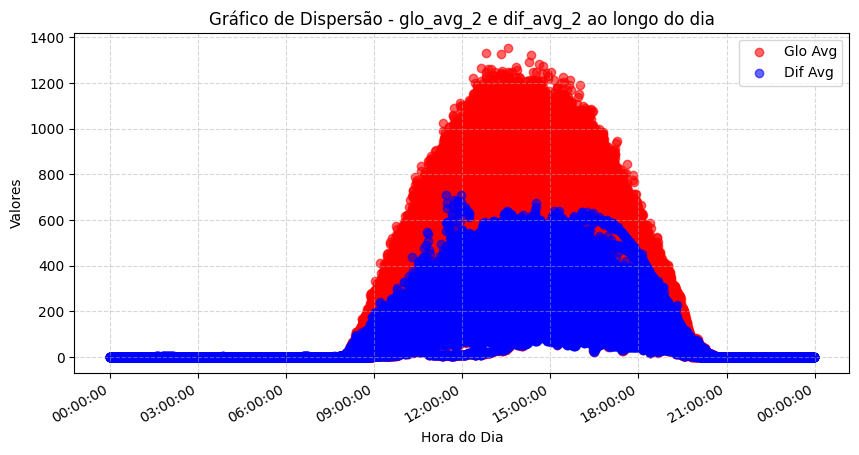

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the 'hora' column to datetime objects
# Keeping the date part for matplotlib to handle correctly
df_filtrado['hora'] = pd.to_datetime(df_filtrado['hora'], format='%H:%M:%S')

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 5)) # Get the axes object

ax.scatter(df_filtrado['hora'], df_filtrado['glo_avg_2'], label="Glo Avg", alpha=0.6, color='red')
ax.scatter(df_filtrado['hora'], df_filtrado['dif_avg_2'], label="Dif Avg", alpha=0.6, color='blue')

# Format the x-axis to display only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # Use DateFormatter

# Adjustments to the graph
ax.set_xlabel("Hora do Dia")
ax.set_ylabel("Valores")
ax.set_title("Gráfico de Dispersão - glo_avg_2 e dif_avg_2 ao longo do dia")
ax.legend()
fig.autofmt_xdate() # Rotate x-axis labels for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Display
plt.show()

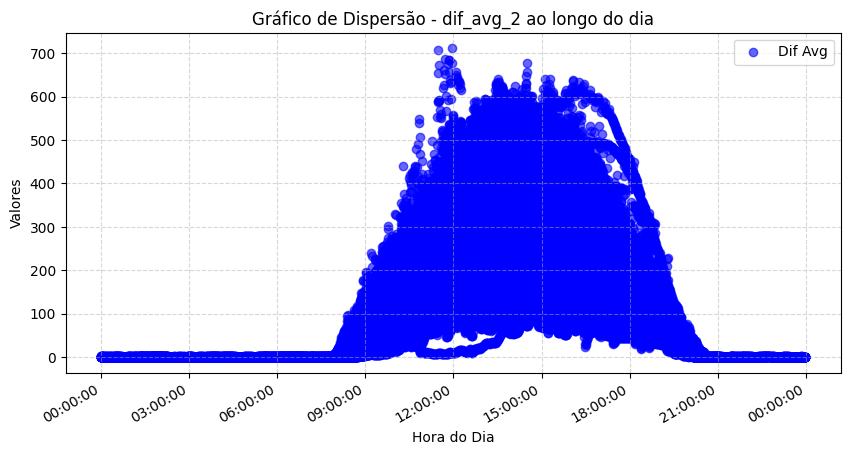

In [7]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 5)) # Get the axes object

#ax.scatter(df_filtrado['hora'], df_filtrado['glo_avg_2'], label="Glo Avg", alpha=0.6, color='red')
ax.scatter(df_filtrado['hora'], df_filtrado['dif_avg_2'], label="Dif Avg", alpha=0.6, color='blue')

# Format the x-axis to display only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # Use DateFormatter

# Adjustments to the graph
ax.set_xlabel("Hora do Dia")
ax.set_ylabel("Valores")
ax.set_title("Gráfico de Dispersão - dif_avg_2 ao longo do dia")
ax.legend()
fig.autofmt_xdate() # Rotate x-axis labels for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Display
plt.show()

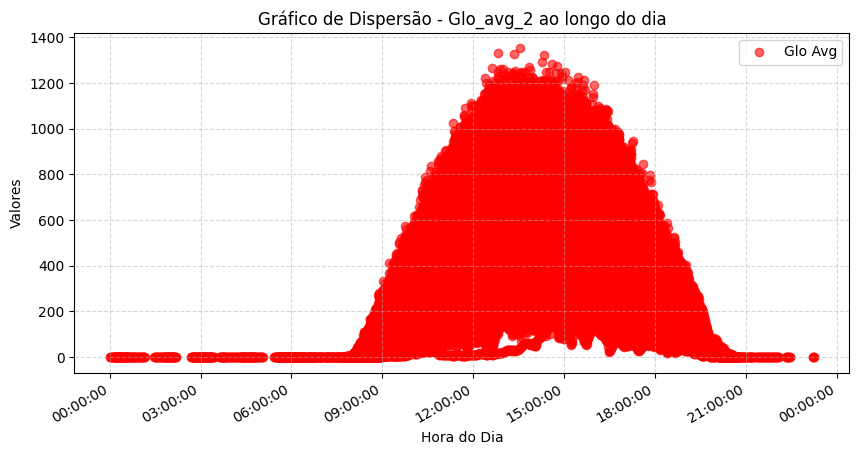

In [8]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 5)) # Get the axes object

ax.scatter(df_filtrado['hora'], df_filtrado['glo_avg_2'], label="Glo Avg", alpha=0.6, color='red')
#ax.scatter(df_filtrado['hora'], df_filtrado['dif_avg_2'], label="Dif Avg", alpha=0.6, color='blue')

# Format the x-axis to display only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # Use DateFormatter

# Adjustments to the graph
ax.set_xlabel("Hora do Dia")
ax.set_ylabel("Valores")
ax.set_title("Gráfico de Dispersão - Glo_avg_2 ao longo do dia")
ax.legend()
fig.autofmt_xdate() # Rotate x-axis labels for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Display
plt.show()

Grafico Dos valores medios por mes

/tmp/ipython-input-2203004414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['mes'] = pd.to_datetime(df_filtrado['data']).dt.month


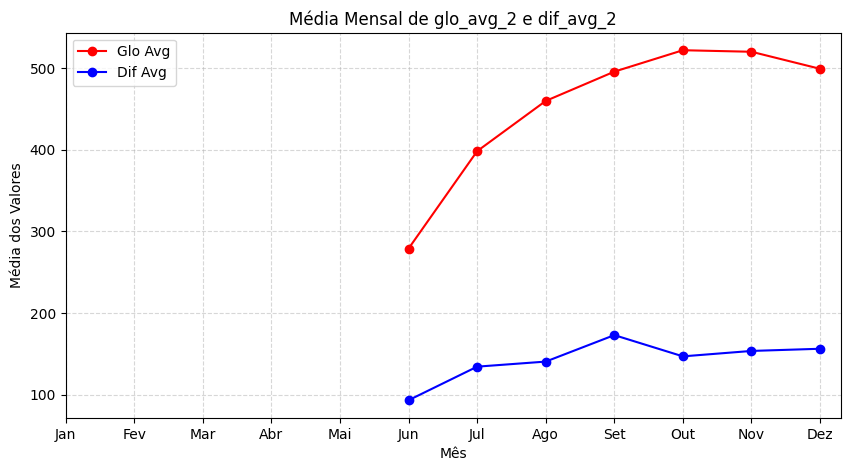

In [9]:
# Criar a coluna de mês
df_filtrado['mes'] = pd.to_datetime(df_filtrado['data']).dt.month

# Agrupar por mês e calcular a média
df_mensal = df_filtrado.groupby('mes')[['glo_avg_2', 'dif_avg_2']].mean()

# Criar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_mensal.index, df_mensal['glo_avg_2'], marker='o', linestyle='-', label="Glo Avg", color='red')
plt.plot(df_mensal.index, df_mensal['dif_avg_2'], marker='o', linestyle='-', label="Dif Avg", color='blue')

# Ajustes no gráfico
plt.xlabel("Mês")
plt.ylabel("Média dos Valores")
plt.title("Média Mensal de glo_avg_2 e dif_avg_2")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir
plt.show()

Grafico Dos valores maximos por mes

/tmp/ipython-input-96525040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['mes'] = pd.to_datetime(df_filtrado['data']).dt.month


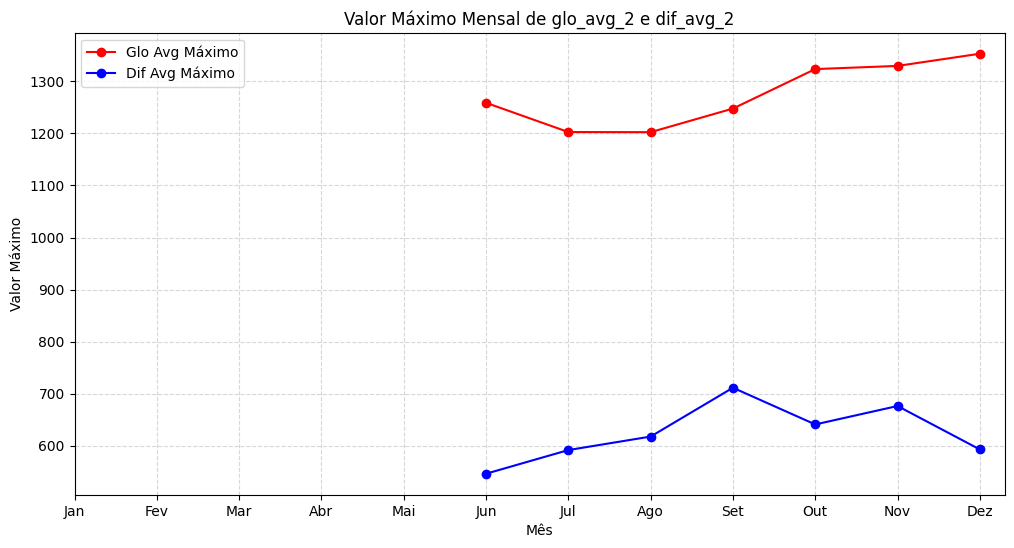


Valores máximos mensais de glo_avg_2:
        mes       data                hora  glo_avg_2
31866     6 2024-06-20 1900-01-01 13:52:00   1258.734
54826     7 2024-07-06 1900-01-01 14:32:00   1202.607
118181    8 2024-08-19 1900-01-01 14:28:00   1202.371
141218    9 2024-09-04 1900-01-01 14:25:00   1247.674
213273   10 2024-10-24 1900-01-01 14:20:00   1323.495
247742   11 2024-11-17 1900-01-01 12:49:00   1329.580
311146   12 2024-12-31 1900-01-01 13:33:00   1352.995

Valores máximos mensais de dif_avg_2:
        mes       data                hora  dif_avg_2
34818     6 2024-06-22 1900-01-01 15:04:00   546.4551
84981     7 2024-07-27 1900-01-01 13:07:00   591.8893
131133    8 2024-08-28 1900-01-01 14:20:00   617.8114
161230    9 2024-09-18 1900-01-01 11:57:00   711.5687
195885   10 2024-10-12 1900-01-01 13:32:00   641.0884
226243   11 2024-11-02 1900-01-01 14:30:00   676.4939
308258   12 2024-12-29 1900-01-01 13:25:00   593.0809


In [10]:
import matplotlib.pyplot as plt

# Criar a coluna de mês
df_filtrado['mes'] = pd.to_datetime(df_filtrado['data']).dt.month

# Encontrar os registros com os valores máximos mensais
max_glo = df_filtrado.loc[df_filtrado.groupby('mes')['glo_avg_2'].idxmax()]
max_dif = df_filtrado.loc[df_filtrado.groupby('mes')['dif_avg_2'].idxmax()]

# Criar o DataFrame mensal para o gráfico
df_mensal = df_filtrado.groupby('mes')[['glo_avg_2', 'dif_avg_2']].max()

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal.index, df_mensal['glo_avg_2'], marker='o', linestyle='-', label="Glo Avg Máximo", color='red')
plt.plot(df_mensal.index, df_mensal['dif_avg_2'], marker='o', linestyle='-', label="Dif Avg Máximo", color='blue')

# Ajustes no gráfico
plt.xlabel("Mês")
plt.ylabel("Valor Máximo")
plt.title("Valor Máximo Mensal de glo_avg_2 e dif_avg_2")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()

# Imprimir os resultados detalhados
print("\nValores máximos mensais de glo_avg_2:")
print(max_glo[['mes', 'data', 'hora', 'glo_avg_2']].sort_values('mes'))

print("\nValores máximos mensais de dif_avg_2:")
print(max_dif[['mes', 'data', 'hora', 'dif_avg_2']].sort_values('mes'))

# Se quiser salvar

In [11]:
# Salvando o novo arquivo CSV
#arquivo_saida = 'novo_arquivo.csv'  # Caminho para salvar o novo arquivo
#df.to_csv(arquivo_saida, index=False)

#print(f"Arquivo salvo como: {arquivo_saida}")

# Cálculo do Ângulo Zenital usando a PVLIB

In [12]:
!pip install pvlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 53.1 MB/s eta 0:00:00


In [13]:
import pandas as pd
import numpy as np
import pvlib
from pvlib import solarposition, irradiance
from pvlib.location import Location as PVLibLocation

In [14]:
# 1. CONFIGURAÇÃO DA LOCALIZAÇÃO (NATAL/RN)
# =============================================
latitude = -5.836750      # Latitude de Natal
longitude = -35.206478    # Longitude de Natal
altitude = 56             # Altitude (metros)


# Use PVLibLocation to create the location object
local = PVLibLocation(
    latitude,
    longitude,
    tz='America/Fortaleza',  # Fuso horário de Natal
    altitude=altitude,
    name='Natal'  # Nome opcional para identificação
)

In [15]:
# Combine 'data' e 'hora' em uma coluna datetime
# Convert 'data' and 'hora' to strings before concatenating
df_filtrado['datetime'] = pd.to_datetime(df_filtrado['data'].astype(str) + ' ' + df_filtrado['hora'].astype(str))

# Check if the datetime column is already timezone-aware
if not df_filtrado['datetime'].dt.tz:
    # If not, localize it to 'America/Fortaleza'
    df_filtrado['datetime'] = df_filtrado['datetime'].dt.tz_localize('America/Fortaleza')
else:
    # If already timezone-aware, print a message or handle accordingly
    print("The 'datetime' column is already timezone-aware.")

# Define como índice do DataFrame
df_filtrado.set_index('datetime', inplace=True)

/tmp/ipython-input-1089196974.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtrado['datetime'] = pd.to_datetime(df_filtrado['data'].astype(str) + ' ' + df_filtrado['hora'].astype(str))


The 'datetime' column is already timezone-aware.


/tmp/ipython-input-1089196974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['datetime'] = pd.to_datetime(df_filtrado['data'].astype(str) + ' ' + df_filtrado['hora'].astype(str))


In [16]:
# Calcula posição solar (zenite, azimute, etc.)
# Ensure 'Temperatura_Datalogger' column is numeric
df_filtrado['Temperatura_Datalogger'] = pd.to_numeric(df_filtrado['Temperatura_Datalogger'], errors='coerce')

solar_pos = solarposition.get_solarposition(
    time=df_filtrado.index,
    latitude=latitude,
    longitude=longitude,
    altitude=altitude,
    temperature=df_filtrado['Temperatura_Datalogger'],  # Opcional: usa temperatura local
    pressure=None  # Pode ser fornecido se disponível
)

# Adiciona ao DataFrame original
df_filtrado['zenital'] = solar_pos['apparent_zenith']  # Ângulo zenital (graus)
df_filtrado['azimutal'] = solar_pos['azimuth']        # Ângulo azimutal (graus)

/tmp/ipython-input-1828608533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Temperatura_Datalogger'] = pd.to_numeric(df_filtrado['Temperatura_Datalogger'], errors='coerce')
/tmp/ipython-input-1828608533.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['zenital'] = solar_pos['apparent_zenith']  # Ângulo zenital (graus)
/tmp/ipython-input-1828608533.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [17]:
# Radiação extraterrestre (W/m²)
df_filtrado['radiacao_extraterrestre'] = irradiance.get_extra_radiation(df_filtrado.index)

/tmp/ipython-input-587605468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['radiacao_extraterrestre'] = irradiance.get_extra_radiation(df_filtrado.index)


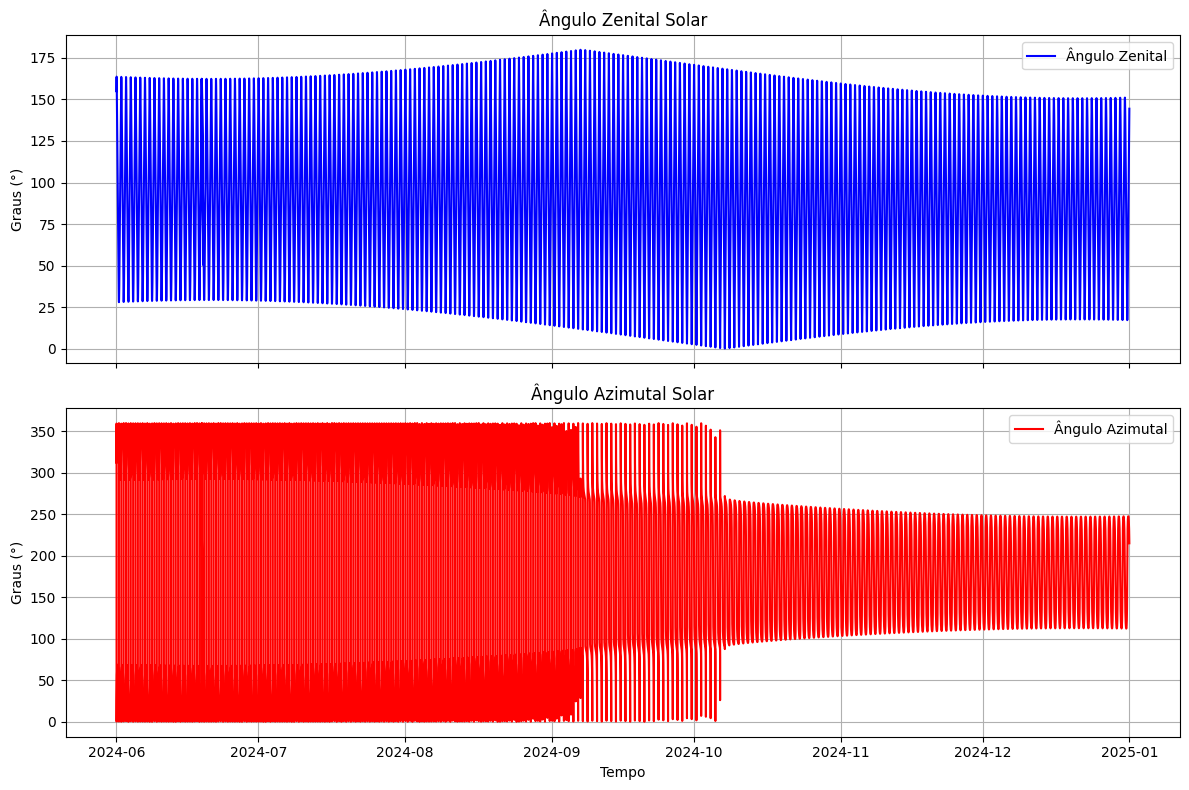

In [18]:
import matplotlib.pyplot as plt

# Criar figura com 2 subplots (um para cada ângulo)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Gráfico do Ângulo Zenital
ax1.plot(df_filtrado.index, df_filtrado['zenital'], label='Ângulo Zenital', color='blue')
ax1.set_ylabel('Graus (°)')
ax1.set_title('Ângulo Zenital Solar')
ax1.legend()
ax1.grid(True)

# Gráfico do Ângulo Azimutal
ax2.plot(df_filtrado.index, df_filtrado['azimutal'], label='Ângulo Azimutal', color='red')
ax2.set_ylabel('Graus (°)')
ax2.set_title('Ângulo Azimutal Solar')
ax2.legend()
ax2.grid(True)

plt.xlabel('Tempo')
plt.tight_layout()  # Melhora o espaçamento entre subplots
plt.show()

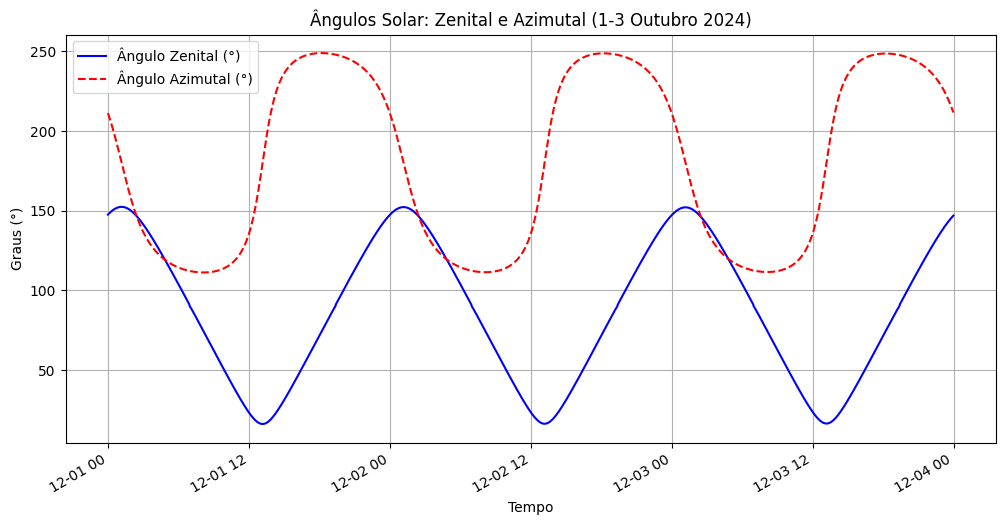

In [19]:
import matplotlib.pyplot as plt

# Filtrar apenas os dias 1, 2 e 3 de outubro de 2024
start_date = '2024-12-01'
end_date = '2024-12-03 23:59:59'
mask = (df_filtrado.index >= start_date) & (df_filtrado.index <= end_date)
df_periodo = df_filtrado.loc[mask]

# Plotar Zenital e Azimutal no mesmo gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_periodo.index, df_periodo['zenital'], label='Ângulo Zenital (°)', color='blue')
plt.plot(df_periodo.index, df_periodo['azimutal'], label='Ângulo Azimutal (°)', color='red', linestyle='--')

plt.xlabel('Tempo')
plt.ylabel('Graus (°)')
plt.title('Ângulos Solar: Zenital e Azimutal (1-3 Outubro 2024)')
plt.legend()
plt.grid(True)
plt.gcf().autofmt_xdate()  # Melhor formatação das datas
plt.show()

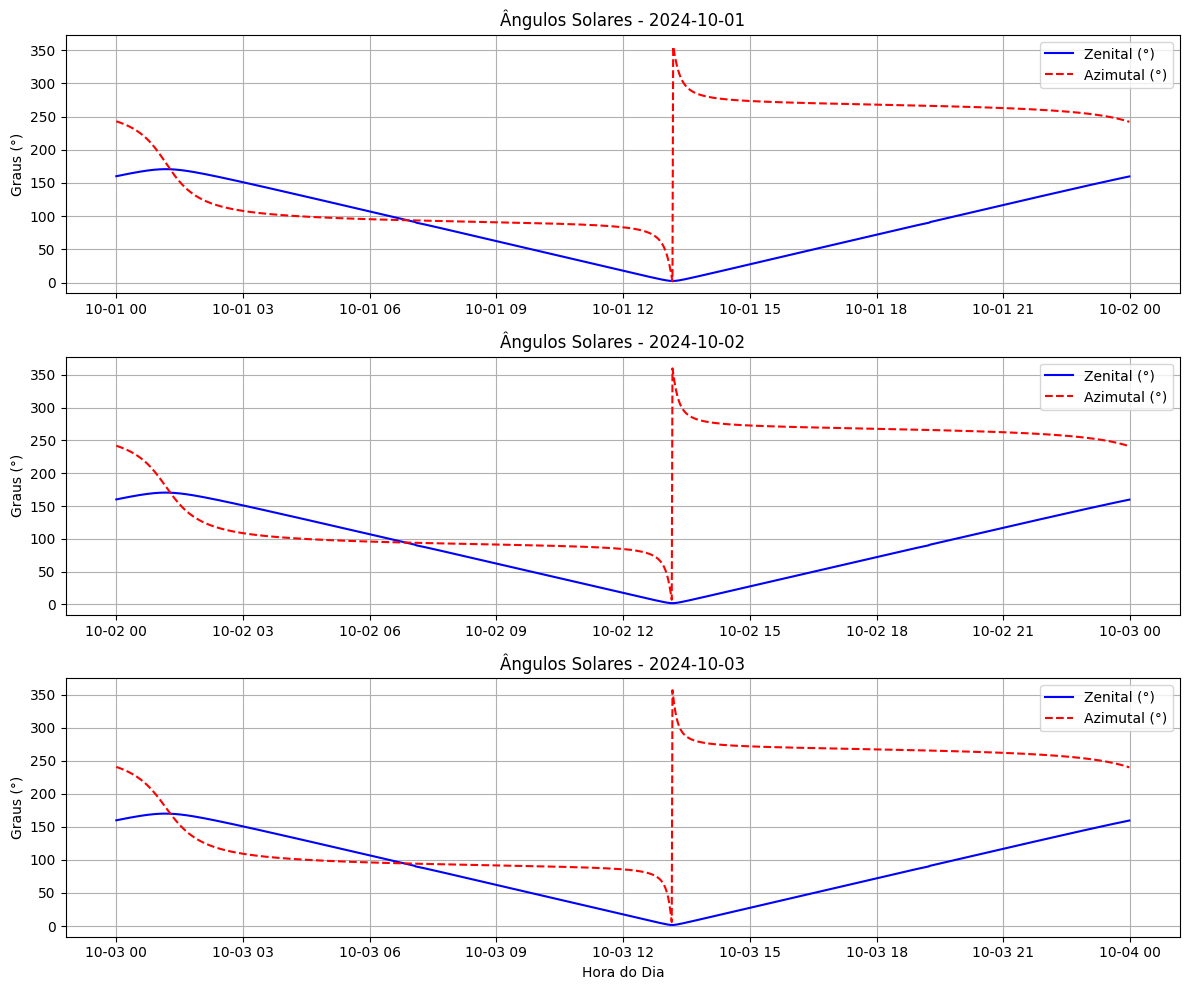

In [20]:
dias = ['2024-10-01', '2024-10-02', '2024-10-03']
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=False)

for i, dia in enumerate(dias):
    df_dia = df_filtrado.loc[dia]
    axes[i].plot(df_dia.index, df_dia['zenital'], label='Zenital (°)', color='blue')
    axes[i].plot(df_dia.index, df_dia['azimutal'], label='Azimutal (°)', color='red', linestyle='--')
    axes[i].set_ylabel('Graus (°)')
    axes[i].set_title(f'Ângulos Solares - {dia}')
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel('Hora do Dia')
plt.tight_layout()
plt.show()

# Validando o GHI
Aplicando os testes de qualidade sobre a variável Global GHI (Algoritimo 1 e 2 do website SONDA)

/tmp/ipython-input-3802054065.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtrado['datetime'] = pd.to_datetime(df_filtrado['data'].astype(str) + ' ' + df_filtrado['hora'].astype(str))
/tmp/ipython-input-3802054065.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['datetime'] = pd.to_datetime(df_filtrado['data'].astype(str) + ' ' + df_filtrado['hora'].astype(str))
/tmp/ipython-input-3802054065.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

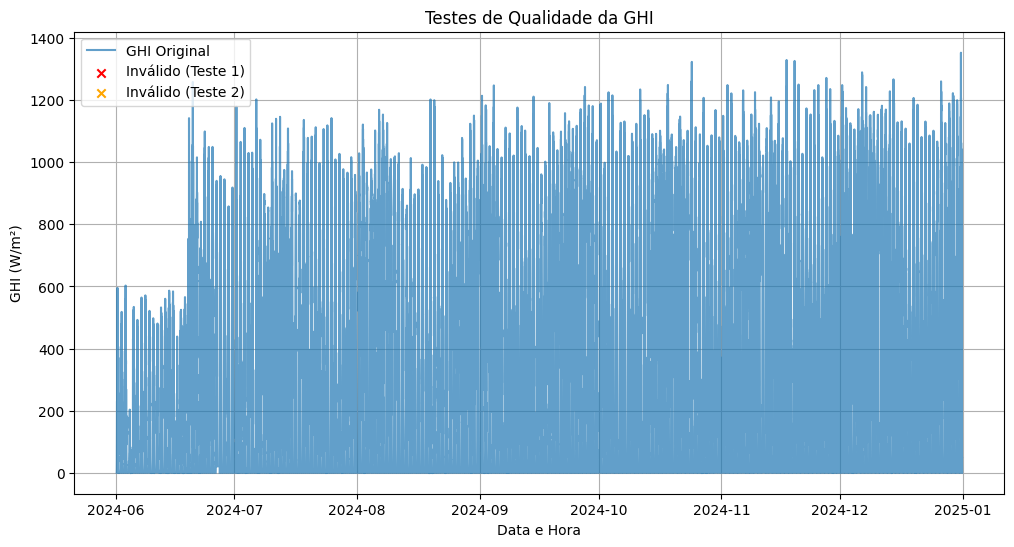

Valores NaN encontrados: 148808
Valores inválidos no Teste 1: 0
Valores inválidos no Teste 2: 0


In [21]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt

latitude = -5.836750      # Latitude de Natal
longitude = -35.206478    # Longitude de Natal
altitude = 56             # Altitude (metros)

# Criar localização
site = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz='America/Sao_Paulo')

# Converter 'data' e 'hora' para datetime
df_filtrado['datetime'] = pd.to_datetime(df_filtrado['data'].astype(str) + ' ' + df_filtrado['hora'].astype(str))

# Check if the datetime column is already timezone-aware
if not df_filtrado['datetime'].dt.tz:
    df_filtrado['datetime'] = df_filtrado['datetime'].dt.tz_localize('America/Sao_Paulo')
else:
    df_filtrado['datetime'] = df_filtrado['datetime'].dt.tz_convert('America/Sao_Paulo')

# Calcular o ângulo zenital solar
solar_position = site.get_solarposition(df_filtrado['datetime'])

# Calcular a irradiação extraterrestre (G0)
df_filtrado['G0'] = pvlib.irradiance.get_extra_radiation(df_filtrado['datetime'].index)

# Contar valores NaN antes dos testes
nan_count = df_filtrado['glo_avg_2'].isna().sum()

# Teste 1: Limites físicos (0 <= GHI <= 1.2 * G0)
# Usamos fillna(False) para tratar NaNs como False nos testes
df_filtrado['GHI_valido_teste1'] = (df_filtrado['glo_avg_2'].fillna(0) >= 0) & (df_filtrado['glo_avg_2'].fillna(0) <= 1.2 * df_filtrado['G0'])
df_filtrado.loc[df_filtrado['glo_avg_2'].isna(), 'GHI_valido_teste1'] = np.nan  # Mantém NaN onde original era NaN

# Teste 2: Limites extremos (0 <= GHI <= 1.5 * G0)
df_filtrado['GHI_valido_teste2'] = (df_filtrado['glo_avg_2'].fillna(0) >= 0) & (df_filtrado['glo_avg_2'].fillna(0) <= 1.5 * df_filtrado['G0'])
df_filtrado.loc[df_filtrado['glo_avg_2'].isna(), 'GHI_valido_teste2'] = np.nan  # Mantém NaN onde original era NaN

# Marcar valores inválidos (considerando apenas os não-NaN)
df_filtrado['GHI_invalido_teste1'] = df_filtrado['GHI_valido_teste1'].eq(False) & df_filtrado['glo_avg_2'].notna()
df_filtrado['GHI_invalido_teste2'] = df_filtrado['GHI_valido_teste2'].eq(False) & df_filtrado['glo_avg_2'].notna()

# Substituir valores inválidos por NaN (opcional)
df_filtrado['glo_avg_2_corrigido'] = df_filtrado['glo_avg_2'].where(df_filtrado['GHI_valido_teste1'].fillna(True), np.nan)

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado['datetime'], df_filtrado['glo_avg_2'], label='GHI Original', alpha=0.7)
plt.scatter(df_filtrado.loc[df_filtrado['GHI_invalido_teste1'], 'datetime'],
            df_filtrado.loc[df_filtrado['GHI_invalido_teste1'], 'glo_avg_2'],
            color='red', label='Inválido (Teste 1)', marker='x')
plt.scatter(df_filtrado.loc[df_filtrado['GHI_invalido_teste2'], 'datetime'],
            df_filtrado.loc[df_filtrado['GHI_invalido_teste2'], 'glo_avg_2'],
            color='orange', label='Inválido (Teste 2)', marker='x')
plt.xlabel('Data e Hora')
plt.ylabel('GHI (W/m²)')
plt.title('Testes de Qualidade da GHI')
plt.legend()
plt.grid()
plt.show()

# Contagem de valores inválidos e NaN
print("Valores NaN encontrados:", nan_count)
print("Valores inválidos no Teste 1:", df_filtrado['GHI_invalido_teste1'].sum())
print("Valores inválidos no Teste 2:", df_filtrado['GHI_invalido_teste2'].sum())

# Explicação de tantos valores NaN
Logo de início percebi que haviam alguns dados negativos (o que é impossível fisicamente), para não ter problemas futuros substituí todos os valores negatívos de radiação por NaN.

# Validação de DHI

/tmp/ipython-input-4288175539.py:75: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_validacao.loc[df_validacao['dif_avg_2'].isna(), 'DHI_valido_teste1'] = np.nan
/tmp/ipython-input-4288175539.py:82: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_validacao.loc[df_validacao['dif_avg_2'].isna(), 'DHI_valido_teste2'] = np.nan
/tmp/ipython-input-4288175539.py:87: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_validacao.loc[df_validacao['dif_avg_2'].isna(), 'DHI_valid

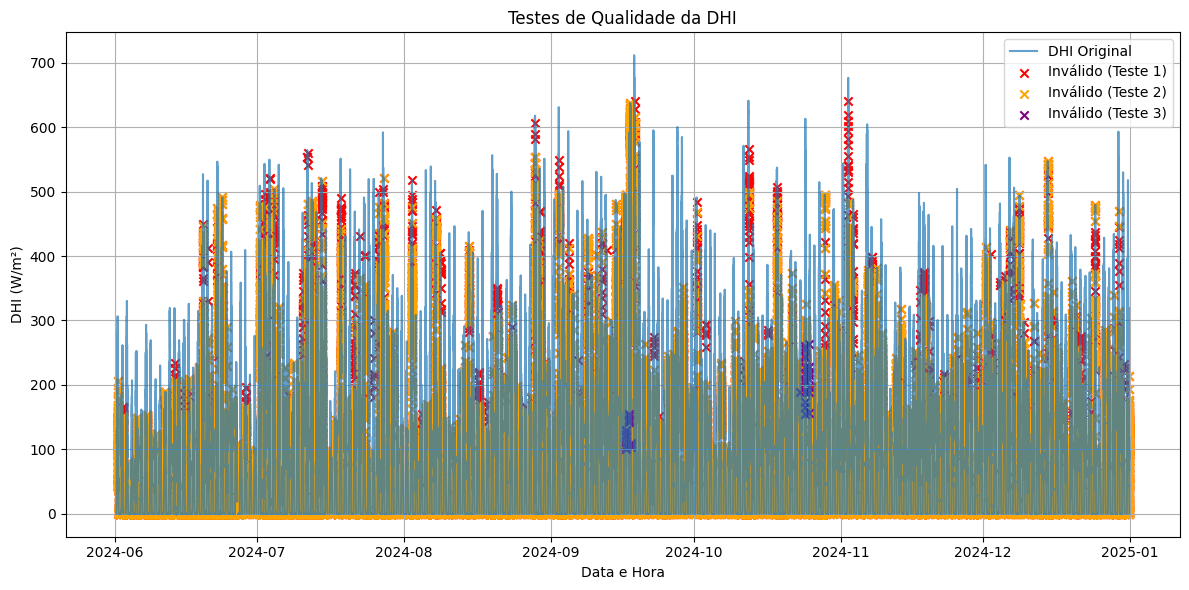


Resumo dos Testes de Qualidade para DHI:
Total de registros: 308028
Valores NaN encontrados: 135048 (43.8%)
Valores inválidos no Teste 1: 58904 (19.1%)
Valores inválidos no Teste 2: 56487 (18.3%)
Valores inválidos no Teste 3: 46 (0.0%)

Dados corrigidos salvos na coluna 'dif_avg_2_corrigido'


In [22]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt

# Configuração do local
latitude = -5.836750      # Latitude de Natal
longitude = -35.206478    # Longitude de Natal
altitude = 56             # Altitude (metros)

# Criar localização
site = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz='America/Sao_Paulo')

# SOLUÇÃO PARA OS WARNINGS:
# 1. Criar uma cópia explícita do DataFrame para evitar SettingWithCopyWarning
df_validacao = df_filtrado.copy()

# 2. Converter data/hora para string e depois para datetime
try:
    # Ensure 'data' is in date string format (YYYY-MM-DD)
    df_validacao['data_str'] = df_validacao['data'].dt.strftime('%Y-%m-%d')
    # Ensure 'hora' is in time string format (HH:MM:SS)
    df_validacao['hora_str'] = df_validacao['hora'].dt.strftime('%H:%M:%S')

    # Concatenate the string representations and convert to datetime
    df_validacao['datetime'] = pd.to_datetime(
        df_validacao['data_str'] + ' ' + df_validacao['hora_str'],
        format='%Y-%m-%d %H:%M:%S'
    )

    # Remove the temporary string columns
    df_validacao = df_validacao.drop(columns=['data_str', 'hora_str'])

    # Remove duplicates if they exist
    df_validacao = df_validacao.drop_duplicates(subset=['datetime'])

    # Verify and adjust timezone
    if not df_validacao['datetime'].dt.tz:
        df_validacao['datetime'] = df_validacao['datetime'].dt.tz_localize('America/Sao_Paulo')
    else:
        df_validacao['datetime'] = df_validacao['datetime'].dt.tz_convert('America/Sao_Paulo')

    # Set datetime as index (removes issues with duplicates)
    df_validacao = df_validacao.set_index('datetime')

except Exception as e:
    print(f"Erro ao processar datas: {e}")
    raise

# Calcular o ângulo zenital solar
try:
    # Ensure the index is a DatetimeIndex before passing to get_solarposition
    if not isinstance(df_validacao.index, pd.DatetimeIndex):
         df_validacao.index = pd.to_datetime(df_validacao.index, utc=True).tz_convert('America/Sao_Paulo')

    solar_position = site.get_solarposition(df_validacao.index)
    df_validacao['zenith'] = solar_position['apparent_zenith']
except Exception as e:
    print(f"Erro ao calcular posição solar: {e}")
    raise

# Calcular a irradiação extraterrestre (G0)
df_validacao['G0'] = pvlib.irradiance.get_extra_radiation(df_validacao.index)

# Contar valores NaN antes dos testes
nan_count = df_validacao['dif_avg_2'].isna().sum()

## Algoritmo 1: Limites físicos para DHI
cos_zenith = np.cos(np.radians(df_validacao['zenith']))
df_validacao['DHI_max_teste1'] = 0.95 * df_validacao['G0'] * (cos_zenith**1.2) + 50
df_validacao['DHI_valido_teste1'] = (df_validacao['dif_avg_2'].fillna(0) >= 0) & \
                                  (df_validacao['dif_avg_2'].fillna(0) <= df_validacao['DHI_max_teste1']) & \
                                  (df_validacao['zenith'] <= 85)
df_validacao.loc[df_validacao['dif_avg_2'].isna(), 'DHI_valido_teste1'] = np.nan

## Algoritmo 2: Limites extremos para DHI
df_validacao['DHI_max_teste2'] = 1.2 * df_validacao['G0'] * (cos_zenith**1.2) + 100
df_validacao['DHI_valido_teste2'] = (df_validacao['dif_avg_2'].fillna(0) >= 0) & \
                                  (df_validacao['dif_avg_2'].fillna(0) <= df_validacao['DHI_max_teste2']) & \
                                  (df_validacao['zenith'] <= 85)
df_validacao.loc[df_validacao['dif_avg_2'].isna(), 'DHI_valido_teste2'] = np.nan

## Algoritmo 3: Relação entre DHI e GHI (quando disponível)
if 'glo_avg_2' in df_validacao.columns:
    df_validacao['DHI_valido_teste3'] = (df_validacao['dif_avg_2'].fillna(0) <= (df_validacao['glo_avg_2'].fillna(0) + 50))
    df_validacao.loc[df_validacao['dif_avg_2'].isna(), 'DHI_valido_teste3'] = np.nan
else:
    print("AVISO: Coluna 'glo_avg_2' não encontrada. Teste 3 não foi aplicado.")

# Marcar valores inválidos
df_validacao['DHI_invalido_teste1'] = df_validacao['DHI_valido_teste1'].eq(False) & df_validacao['dif_avg_2'].notna()
df_validacao['DHI_invalido_teste2'] = df_validacao['DHI_valido_teste2'].eq(False) & df_validacao['dif_avg_2'].notna()

if 'DHI_valido_teste3' in df_validacao.columns:
    df_validacao['DHI_invalido_teste3'] = df_validacao['DHI_valido_teste3'].eq(False) & df_validacao['dif_avg_2'].notna()

# Substituir valores inválidos por NaN
df_validacao['dif_avg_2_corrigido'] = df_validacao['dif_avg_2'].where(df_validacao['DHI_valido_teste1'].fillna(True), np.nan)

# Visualização
plt.figure(figsize=(12, 6))
plt.plot(df_validacao.index, df_validacao['dif_avg_2'], label='DHI Original', alpha=0.7)

# Plotar pontos inválidos
colors = ['red', 'orange', 'purple']
tests = ['DHI_invalido_teste1', 'DHI_invalido_teste2', 'DHI_invalido_teste3']
labels = ['Inválido (Teste 1)', 'Inválido (Teste 2)', 'Inválido (Teste 3)']

for color, test, label in zip(colors, tests, labels):
    if test in df_validacao.columns:
        invalid_data = df_validacao[df_validacao[test]]
        plt.scatter(invalid_data.index, invalid_data['dif_avg_2'], color=color, label=label, marker='x')

plt.xlabel('Data e Hora')
plt.ylabel('DHI (W/m²)')
plt.title('Testes de Qualidade da DHI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Resumo estatístico
print("\nResumo dos Testes de Qualidade para DHI:")
print(f"Total de registros: {len(df_validacao)}")
print(f"Valores NaN encontrados: {nan_count} ({nan_count/len(df_validacao):.1%})")

for i, test in enumerate(['DHI_invalido_teste1', 'DHI_invalido_teste2', 'DHI_invalido_teste3'], 1):
    if test in df_validacao.columns:
        count = df_validacao[test].sum()
        print(f"Valores inválidos no Teste {i}: {count} ({count/len(df_validacao):.1%})")

print("\nDados corrigidos salvos na coluna 'dif_avg_2_corrigido'")

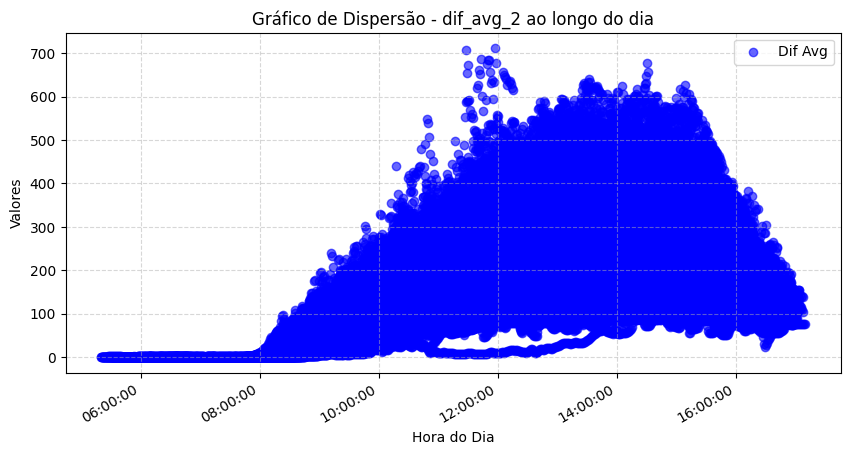

In [23]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 5)) # Get the axes object

#ax.scatter(df_filtrado['hora'], df_filtrado['glo_avg_2'], label="Glo Avg", alpha=0.6, color='red')
ax.scatter(df_validacao['hora'], df_validacao['dif_avg_2_corrigido'], label="Dif Avg", alpha=0.6, color='blue')

# Format the x-axis to display only the time
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # Use DateFormatter

# Adjustments to the graph
ax.set_xlabel("Hora do Dia")
ax.set_ylabel("Valores")
ax.set_title("Gráfico de Dispersão - dif_avg_2 ao longo do dia")
ax.legend()
fig.autofmt_xdate() # Rotate x-axis labels for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Display
plt.show()

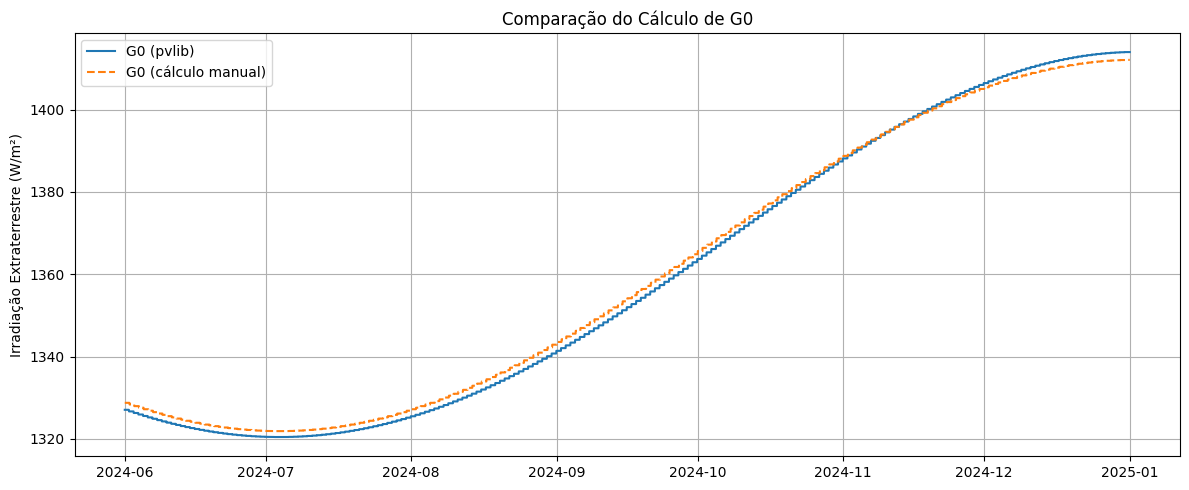


Diferença máxima entre métodos G0: 2.1888 W/m²
Diferença média: 1.4762 W/m²


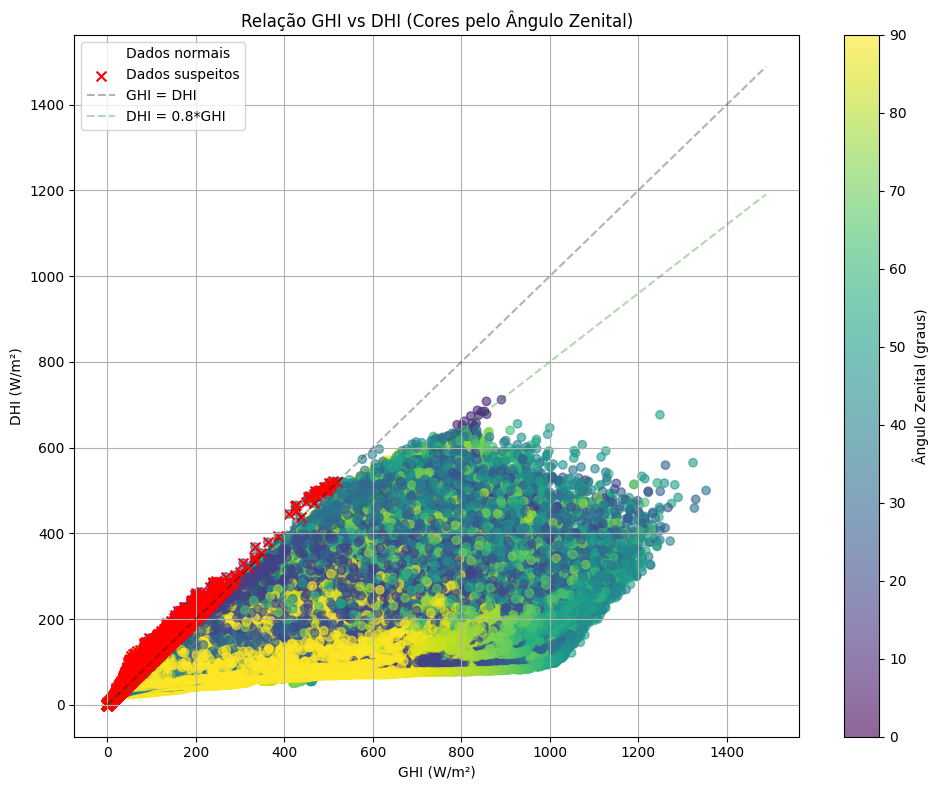


Estatísticas dos Dados Suspeitos:
Total de registros: 308028
Registros suspeitos: 17201 (5.6%)

Características dos registros suspeitos:
          glo_avg_2     dif_avg_2        zenith
count  17201.000000  17201.000000  17201.000000
mean      36.747902     39.801588     65.706902
std       49.779939     53.046721     38.457098
min        0.000153      0.008048      3.717752
25%        3.801569      4.391402     40.173620
50%       19.258740     20.630410     47.095544
75%       48.647950     52.791590    102.645659
max      518.891800    521.375400    169.049104


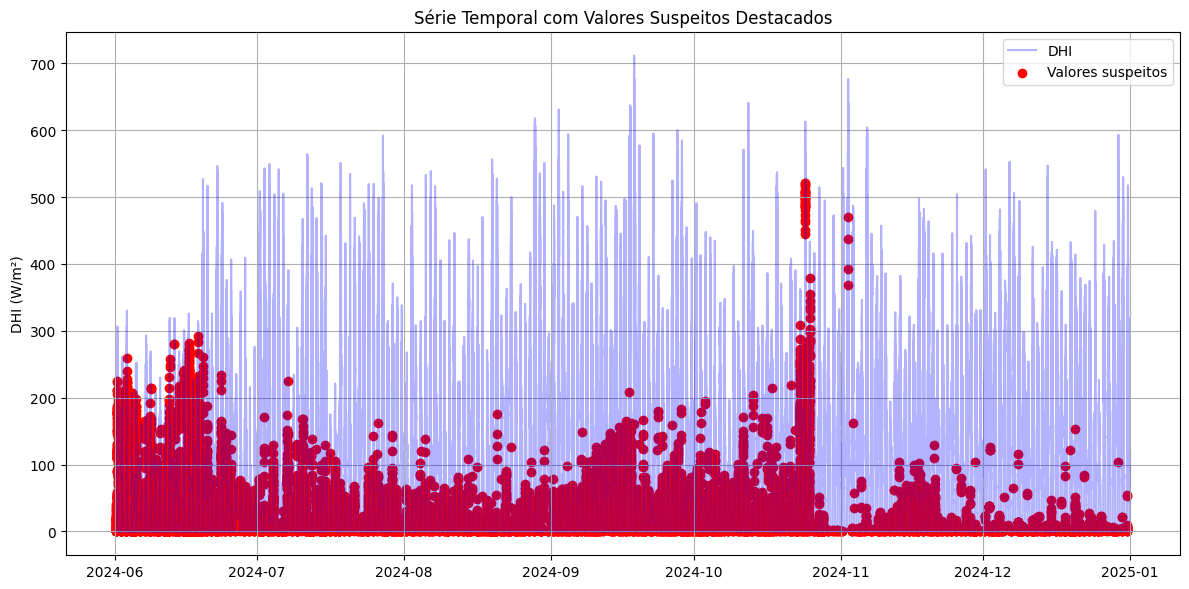

/tmp/ipython-input-2615111325.py:141: UserWarning: Adding colorbar to a different Figure <Figure size 1000x800 with 3 Axes> than <Figure size 1000x600 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(sc, label='Ângulo Zenital (graus)')


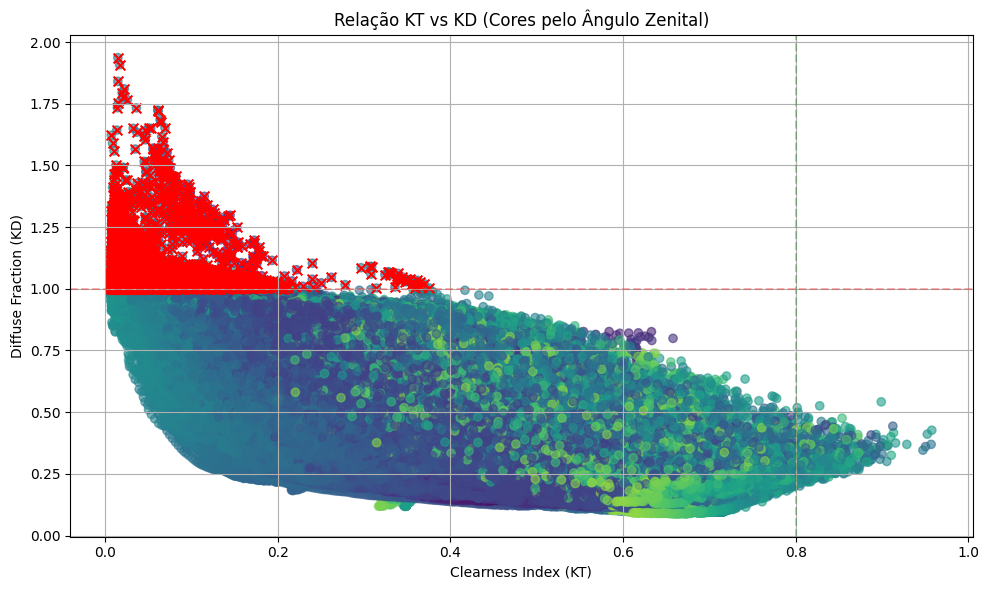

In [24]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt
from matplotlib import colors

# Configuração do local
latitude = -5.836750
longitude = -35.206478
altitude = 56
site = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz='America/Sao_Paulo')

## 1. Verificação do cálculo de G0 (Irradiação Extraterrestre)
# Calcular G0 com duas abordagens para comparação
df_validacao['G0_pvlib'] = pvlib.irradiance.get_extra_radiation(df_validacao.index)
df_validacao['G0_manual'] = 1367 * (1 + 0.033 * np.cos(np.radians(360 * (df_validacao.index.dayofyear - 3)/365)))

# Plotar comparação
plt.figure(figsize=(12, 5))
plt.plot(df_validacao.index, df_validacao['G0_pvlib'], label='G0 (pvlib)')
plt.plot(df_validacao.index, df_validacao['G0_manual'], '--', label='G0 (cálculo manual)')
plt.title('Comparação do Cálculo de G0')
plt.ylabel('Irradiação Extraterrestre (W/m²)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Verificar diferenças
diff = (df_validacao['G0_pvlib'] - df_validacao['G0_manual']).abs()
print(f"\nDiferença máxima entre métodos G0: {diff.max():.4f} W/m²")
print(f"Diferença média: {diff.mean():.4f} W/m²")

## 2. Análise de Dispersão GHI vs DHI com Valores Suspeitos
plt.figure(figsize=(10, 8))

# Criar máscara para valores suspeitos de DHI
mask_suspeito = (
    (df_validacao['dif_avg_2'] > df_validacao['glo_avg_2']) |  # DHI > GHI
    (df_validacao['dif_avg_2'] < 0) |                         # DHI negativo
    (df_validacao['zenith'] <= 85) & (df_validacao['dif_avg_2'] > 1000)  # Valores muito altos
)

# Plotar dispersão com cores por ângulo zenital
norm = colors.Normalize(vmin=0, vmax=90)
sc = plt.scatter(
    df_validacao['glo_avg_2'],
    df_validacao['dif_avg_2'],
    c=df_validacao['zenith'],
    cmap='viridis',
    norm=norm,
    alpha=0.6,
    label='Dados normais'
)

# Destacar valores suspeitos
plt.scatter(
    df_validacao.loc[mask_suspeito, 'glo_avg_2'],
    df_validacao.loc[mask_suspeito, 'dif_avg_2'],
    color='red',
    marker='x',
    s=50,
    label='Dados suspeitos'
)

# Linhas de referência
max_val = max(df_validacao['glo_avg_2'].max(), df_validacao['dif_avg_2'].max()) * 1.1
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.3, label='GHI = DHI')
plt.plot([0, max_val], [0, 0.8*max_val], 'g--', alpha=0.3, label='DHI = 0.8*GHI')

plt.xlabel('GHI (W/m²)')
plt.ylabel('DHI (W/m²)')
plt.title('Relação GHI vs DHI (Cores pelo Ângulo Zenital)')
plt.colorbar(sc, label='Ângulo Zenital (graus)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## 3. Estatísticas dos Valores Suspeitos
print("\nEstatísticas dos Dados Suspeitos:")
print(f"Total de registros: {len(df_validacao)}")
print(f"Registros suspeitos: {mask_suspeito.sum()} ({mask_suspeito.mean()*100:.1f}%)")

if mask_suspeito.any():
    print("\nCaracterísticas dos registros suspeitos:")
    print(df_validacao.loc[mask_suspeito, ['glo_avg_2', 'dif_avg_2', 'zenith']].describe())

    # Plotar série temporal dos valores suspeitos
    plt.figure(figsize=(12, 6))
    plt.plot(df_validacao.index, df_validacao['dif_avg_2'], 'b-', alpha=0.3, label='DHI')
    plt.scatter(
        df_validacao.loc[mask_suspeito].index,
        df_validacao.loc[mask_suspeito, 'dif_avg_2'],
        color='red',
        label='Valores suspeitos'
    )
    plt.title('Série Temporal com Valores Suspeitos Destacados')
    plt.ylabel('DHI (W/m²)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

## 4. Relação KT (Clearness Index) vs KD (Diffuse Fraction)
df_validacao['KT'] = df_validacao['glo_avg_2'] / df_validacao['G0_pvlib']  # Índice de claridade
df_validacao['KD'] = df_validacao['dif_avg_2'] / df_validacao['glo_avg_2']  # Fração difusa

# Filtrar para ângulos zenitais razoáveis e GHI > 0
mask_analysis = (df_validacao['zenith'] <= 75) & (df_validacao['glo_avg_2'] > 10)
df_analysis = df_validacao.loc[mask_analysis].copy()

# Plotar relação esperada KT vs KD
plt.figure(figsize=(10, 6))
plt.scatter(
    df_analysis['KT'],
    df_analysis['KD'],
    c=df_analysis['zenith'],
    cmap='viridis',
    norm=norm,
    alpha=0.6
)

# Destacar valores suspeitos
plt.scatter(
    df_analysis.loc[mask_suspeito & mask_analysis, 'KT'],
    df_analysis.loc[mask_suspeito & mask_analysis, 'KD'],
    color='red',
    marker='x',
    s=50,
    label='Dados suspeitos'
)

# Linhas de referência
plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0.8, color='g', linestyle='--', alpha=0.3)
plt.xlabel('Clearness Index (KT)')
plt.ylabel('Diffuse Fraction (KD)')
plt.title('Relação KT vs KD (Cores pelo Ângulo Zenital)')
plt.colorbar(sc, label='Ângulo Zenital (graus)')
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
# Criar máscara para valores suspeitos de DHI
mask_suspeito = (
    (df_validacao['dif_avg_2'] > df_validacao['glo_avg_2']) |  # DHI > GHI
    (df_validacao['dif_avg_2'] < 0) |  # DHI negativo
    (df_validacao['zenith'] <= 85) & (df_validacao['dif_avg_2'] > 1000)  # Valores muito altos
)

# Filtrar os dados suspeitos
dados_suspeitos = df_validacao[mask_suspeito].copy()

# Selecionar as colunas relevantes e pegar os 20 primeiros
lista_suspeitos = dados_suspeitos[['glo_avg_2', 'dif_avg_2', 'zenith']].head(100)

# Adicionar a coluna de data/hora como primeira coluna
lista_suspeitos.insert(0, 'Data_Hora', lista_suspeitos.index)

# Formatar a saída
print("\nLista dos 20 primeiros dados suspeitos:")
print("="*70)
print(f"{'Data/Hora':<25} | {'GHI (W/m²)':>10} | {'DHI (W/m²)':>10} | {'Zenith (°)':>10}")
print("-"*70)

for i, (data_hora, row) in enumerate(lista_suspeitos.iterrows(), 1):
    print(f"{data_hora.strftime('%Y-%m-%d %H:%M:%S'):<25} | "
          f"{row['glo_avg_2']:>10.2f} | "
          f"{row['dif_avg_2']:>10.2f} | "
          f"{row['zenith']:>10.2f}")

print("="*70)

# Mostrar estatísticas
print(f"\nTotal de dados suspeitos encontrados: {len(dados_suspeitos)}")
print(f"Percentual sobre o total: {len(dados_suspeitos)/len(df_validacao)*100:.2f}%")


Lista dos 20 primeiros dados suspeitos:
Data/Hora                 | GHI (W/m²) | DHI (W/m²) | Zenith (°)
----------------------------------------------------------------------
2024-06-01 08:16:00       |       0.03 |       0.22 |      52.73
2024-06-01 08:17:00       |       0.13 |       0.33 |      52.52
2024-06-01 08:18:00       |       0.26 |       0.50 |      52.32
2024-06-01 08:19:00       |       0.40 |       0.66 |      52.11
2024-06-01 08:20:00       |       0.55 |       0.80 |      51.90
2024-06-01 08:21:00       |       0.68 |       0.94 |      51.70
2024-06-01 08:22:00       |       0.78 |       1.06 |      51.49
2024-06-01 08:23:00       |       0.89 |       1.17 |      51.29
2024-06-01 08:24:00       |       1.00 |       1.29 |      51.08
2024-06-01 08:25:00       |       1.11 |       1.42 |      50.88
2024-06-01 08:26:00       |       1.24 |       1.61 |      50.68
2024-06-01 08:27:00       |       1.44 |       1.84 |      50.47
2024-06-01 08:28:00       |       1.71 |   

In [26]:
import pandas as pd
import numpy as np

# Supondo que seu DataFrame se chame df_validacao
# Com as colunas 'dif_avg_2' (DHI) e 'glo_avg_2' (GHI)

# Criar uma cópia para não alterar o DataFrame original
df_corrigido = df_validacao.copy()

# Identificar e substituir valores onde DHI > GHI
mask_dhi_maior = df_corrigido['dif_avg_2'] > df_corrigido['glo_avg_2']
df_corrigido.loc[mask_dhi_maior, 'dif_avg_2'] = np.nan

# Mostrar estatísticas da correção
num_correcoes = mask_dhi_maior.sum()
total_registros = len(df_corrigido)
percentual = (num_correcoes / total_registros) * 100

print(f"Correções realizadas: {num_correcoes} registros")
print(f"Total de registros: {total_registros}")
print(f"Percentual corrigido: {percentual:.2f}%")

# Opcional: Mostrar exemplos dos registros corrigidos
if num_correcoes > 0:
    print("\nExemplos de registros corrigidos (5 primeiros):")
    exemplos = df_validacao[mask_dhi_maior].head().copy()
    exemplos['dif_avg_2_corrigido'] = df_corrigido.loc[mask_dhi_maior, 'dif_avg_2'].head()
    print(exemplos[['glo_avg_2', 'dif_avg_2', 'dif_avg_2_corrigido']])
else:
    print("\nNenhum registro precisou ser corrigido.")

# DataFrame resultante está em df_corrigido

Correções realizadas: 17201 registros
Total de registros: 308028
Percentual corrigido: 5.58%

Exemplos de registros corrigidos (5 primeiros):
                           glo_avg_2  dif_avg_2  dif_avg_2_corrigido
datetime                                                            
2024-06-01 08:16:00-03:00   0.032211   0.223634                  NaN
2024-06-01 08:17:00-03:00   0.127677   0.334283                  NaN
2024-06-01 08:18:00-03:00   0.259062   0.498433                  NaN
2024-06-01 08:19:00-03:00   0.402206   0.655118                  NaN
2024-06-01 08:20:00-03:00   0.550924   0.801731                  NaN


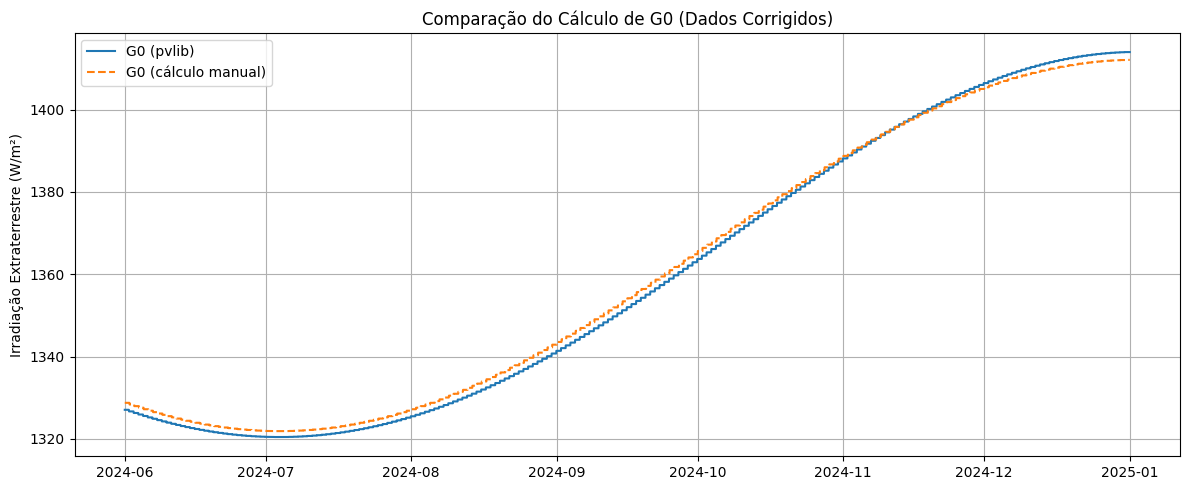


Diferença máxima entre métodos G0: 2.1888 W/m²
Diferença média: 1.4762 W/m²


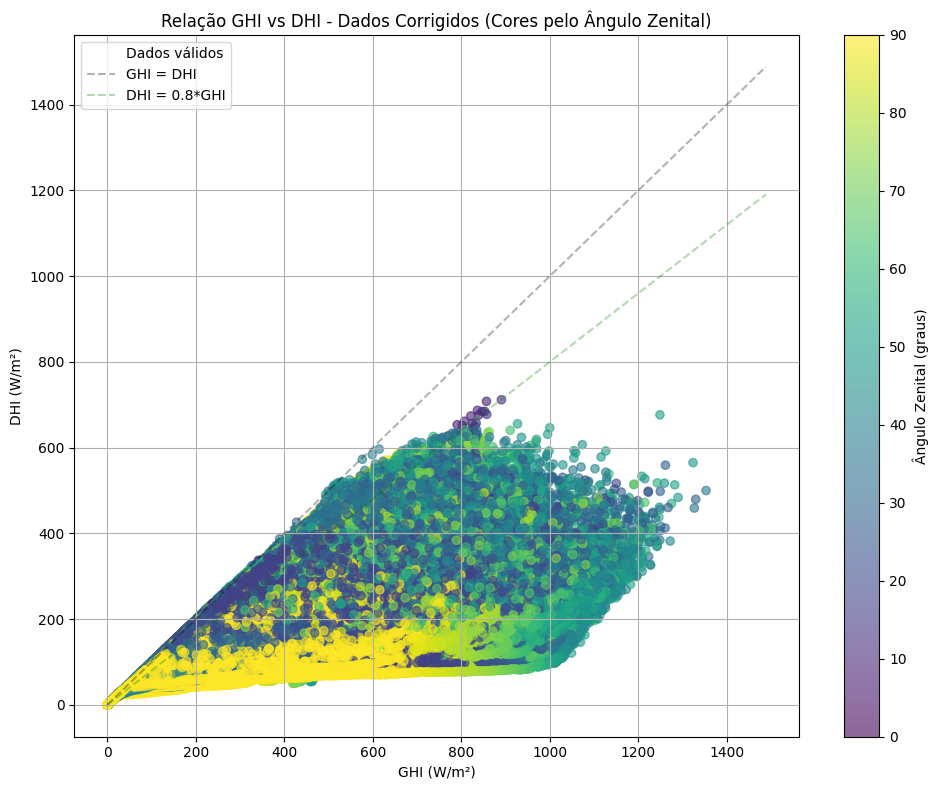


Estatísticas dos Dados Suspeitos Residuais:
Total de registros: 308028
Registros suspeitos residuais: 0 (0.0%)


/tmp/ipython-input-2592726569.py:143: UserWarning: Adding colorbar to a different Figure <Figure size 1000x800 with 3 Axes> than <Figure size 1000x600 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(sc, label='Ângulo Zenital (graus)')


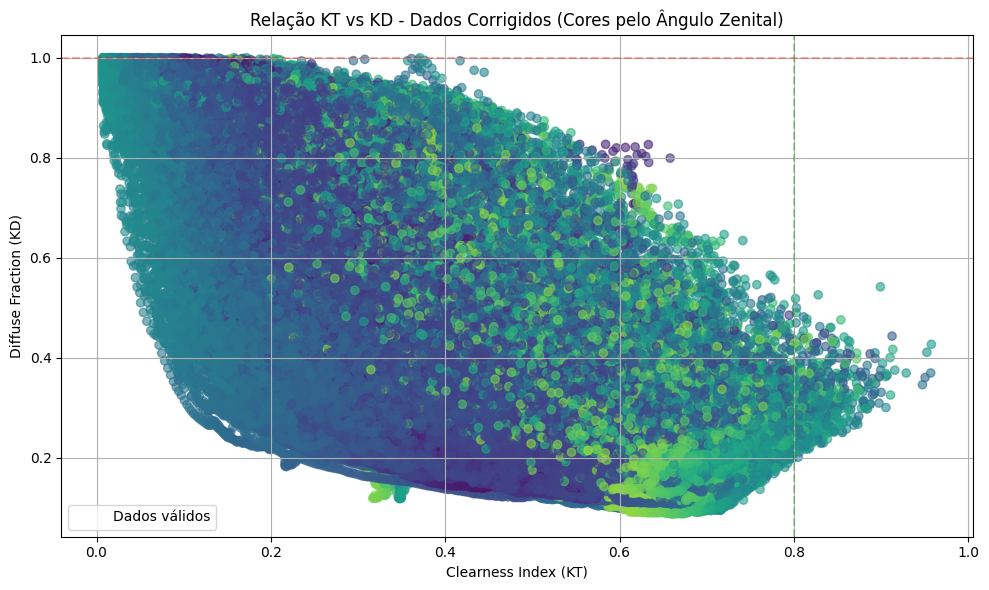

In [27]:
import pandas as pd
import numpy as np
import pvlib
from pvlib.location import Location
import matplotlib.pyplot as plt
from matplotlib import colors

# Configuração do local
latitude = -5.836750
longitude = -35.206478
altitude = 56
site = Location(latitude=latitude, longitude=longitude, altitude=altitude, tz='America/Sao_Paulo')

## 1. Verificação do cálculo de G0 (Irradiação Extraterrestre)
# Calcular G0 com duas abordagens para comparação
df_corrigido['G0_pvlib'] = pvlib.irradiance.get_extra_radiation(df_corrigido.index)
df_corrigido['G0_manual'] = 1367 * (1 + 0.033 * np.cos(np.radians(360 * (df_corrigido.index.dayofyear - 3)/365)))

# Plotar comparação
plt.figure(figsize=(12, 5))
plt.plot(df_corrigido.index, df_corrigido['G0_pvlib'], label='G0 (pvlib)')
plt.plot(df_corrigido.index, df_corrigido['G0_manual'], '--', label='G0 (cálculo manual)')
plt.title('Comparação do Cálculo de G0 (Dados Corrigidos)')
plt.ylabel('Irradiação Extraterrestre (W/m²)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Verificar diferenças
diff = (df_corrigido['G0_pvlib'] - df_corrigido['G0_manual']).abs()
print(f"\nDiferença máxima entre métodos G0: {diff.max():.4f} W/m²")
print(f"Diferença média: {diff.mean():.4f} W/m²")

## 2. Análise de Dispersão GHI vs DHI (com dados corrigidos)
plt.figure(figsize=(10, 8))

# Criar máscara para valores suspeitos residuais (apenas DHI negativo ou > 1000 W/m²)
mask_suspeito_residual = (
    (df_corrigido['dif_avg_2'] < 0) |
    (df_corrigido['zenith'] <= 85) & (df_corrigido['dif_avg_2'] > 1000)
)

# Plotar dispersão com cores por ângulo zenital
norm = colors.Normalize(vmin=0, vmax=90)
sc = plt.scatter(
    df_corrigido['glo_avg_2'],
    df_corrigido['dif_avg_2'],
    c=df_corrigido['zenith'],
    cmap='viridis',
    norm=norm,
    alpha=0.6,
    label='Dados válidos'
)

# Destacar quaisquer valores suspeitos residuais
if mask_suspeito_residual.any():
    plt.scatter(
        df_corrigido.loc[mask_suspeito_residual, 'glo_avg_2'],
        df_corrigido.loc[mask_suspeito_residual, 'dif_avg_2'],
        color='red',
        marker='x',
        s=50,
        label='Dados suspeitos residuais'
    )

# Linhas de referência
max_val = max(df_corrigido['glo_avg_2'].max(), df_corrigido['dif_avg_2'].max()) * 1.1
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.3, label='GHI = DHI')
plt.plot([0, max_val], [0, 0.8*max_val], 'g--', alpha=0.3, label='DHI = 0.8*GHI')

plt.xlabel('GHI (W/m²)')
plt.ylabel('DHI (W/m²)')
plt.title('Relação GHI vs DHI - Dados Corrigidos (Cores pelo Ângulo Zenital)')
plt.colorbar(sc, label='Ângulo Zenital (graus)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## 3. Estatísticas dos Valores Suspeitos Residuais
print("\nEstatísticas dos Dados Suspeitos Residuais:")
print(f"Total de registros: {len(df_corrigido)}")
print(f"Registros suspeitos residuais: {mask_suspeito_residual.sum()} ({mask_suspeito_residual.mean()*100:.1f}%)")

if mask_suspeito_residual.any():
    print("\nCaracterísticas dos registros suspeitos residuais:")
    print(df_corrigido.loc[mask_suspeito_residual, ['glo_avg_2', 'dif_avg_2', 'zenith']].describe())

    # Plotar série temporal dos valores suspeitos residuais
    plt.figure(figsize=(12, 6))
    plt.plot(df_corrigido.index, df_corrigido['dif_avg_2'], 'b-', alpha=0.3, label='DHI')
    plt.scatter(
        df_corrigido.loc[mask_suspeito_residual].index,
        df_corrigido.loc[mask_suspeito_residual, 'dif_avg_2'],
        color='red',
        label='Valores suspeitos residuais'
    )
    plt.title('Série Temporal - Dados Corrigidos com Valores Suspeitos Residuais Destacados')
    plt.ylabel('DHI (W/m²)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

## 4. Relação KT (Clearness Index) vs KD (Diffuse Fraction) - Dados Corrigidos
df_corrigido['KT'] = df_corrigido['glo_avg_2'] / df_corrigido['G0_pvlib']  # Índice de claridade
df_corrigido['KD'] = df_corrigido['dif_avg_2'] / df_corrigido['glo_avg_2']  # Fração difusa

# Filtrar para ângulos zenitais razoáveis e GHI > 0
mask_analysis = (df_corrigido['zenith'] <= 75) & (df_corrigido['glo_avg_2'] > 10)
df_analysis = df_corrigido.loc[mask_analysis].copy()

# Plotar relação esperada KT vs KD
plt.figure(figsize=(10, 6))
plt.scatter(
    df_analysis['KT'],
    df_analysis['KD'],
    c=df_analysis['zenith'],
    cmap='viridis',
    norm=norm,
    alpha=0.6,
    label='Dados válidos'
)

# Destacar valores suspeitos residuais
if mask_suspeito_residual.any():
    plt.scatter(
        df_analysis.loc[mask_suspeito_residual & mask_analysis, 'KT'],
        df_analysis.loc[mask_suspeito_residual & mask_analysis, 'KD'],
        color='red',
        marker='x',
        s=50,
        label='Dados suspeitos residuais'
    )

# Linhas de referência
plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0.8, color='g', linestyle='--', alpha=0.3)
plt.xlabel('Clearness Index (KT)')
plt.ylabel('Diffuse Fraction (KD)')
plt.title('Relação KT vs KD - Dados Corrigidos (Cores pelo Ângulo Zenital)')
plt.colorbar(sc, label='Ângulo Zenital (graus)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

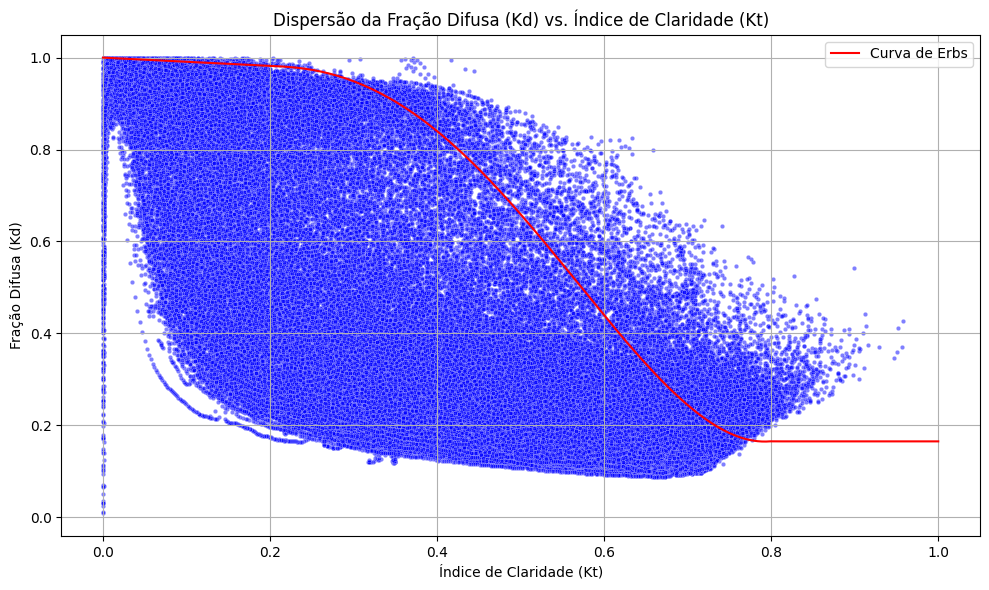

In [28]:
import seaborn as sns

# Aplicar os mesmos filtros para análise (já usados antes)
df_kt_kd = df_corrigido[(df_corrigido['KD'].notnull()) &
                        (df_corrigido['KT'].notnull()) &
                        (df_corrigido['KD'] >= 0) & (df_corrigido['KD'] <= 1) &
                        (df_corrigido['KT'] >= 0) & (df_corrigido['KT'] <= 1)].copy()

# Função da fração difusa segundo Erbs
def erbs_diffuse_fraction(Kt):
    if Kt <= 0.22:
        return 1 - 0.09 * Kt
    elif Kt <= 0.8:
        return 0.9511 - 0.1604 * Kt + 4.388 * Kt**2 - 16.638 * Kt**3 + 12.336 * Kt**4
    else:
        return 0.165

# Plot com seaborn + curva de Erbs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KT', y='KD', data=df_kt_kd, s=10, color='blue', alpha=0.5)
plt.xlabel('Índice de Claridade (Kt)')
plt.ylabel('Fração Difusa (Kd)')
plt.title('Dispersão da Fração Difusa (Kd) vs. Índice de Claridade (Kt)')
plt.grid(True)

# Curva de Erbs
erbs_kt_range = np.linspace(0, 1, 200)
erbs_kd_values = [erbs_diffuse_fraction(kt) for kt in erbs_kt_range]
plt.plot(erbs_kt_range, erbs_kd_values, color='red', label='Curva de Erbs')

plt.legend()
plt.tight_layout()
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

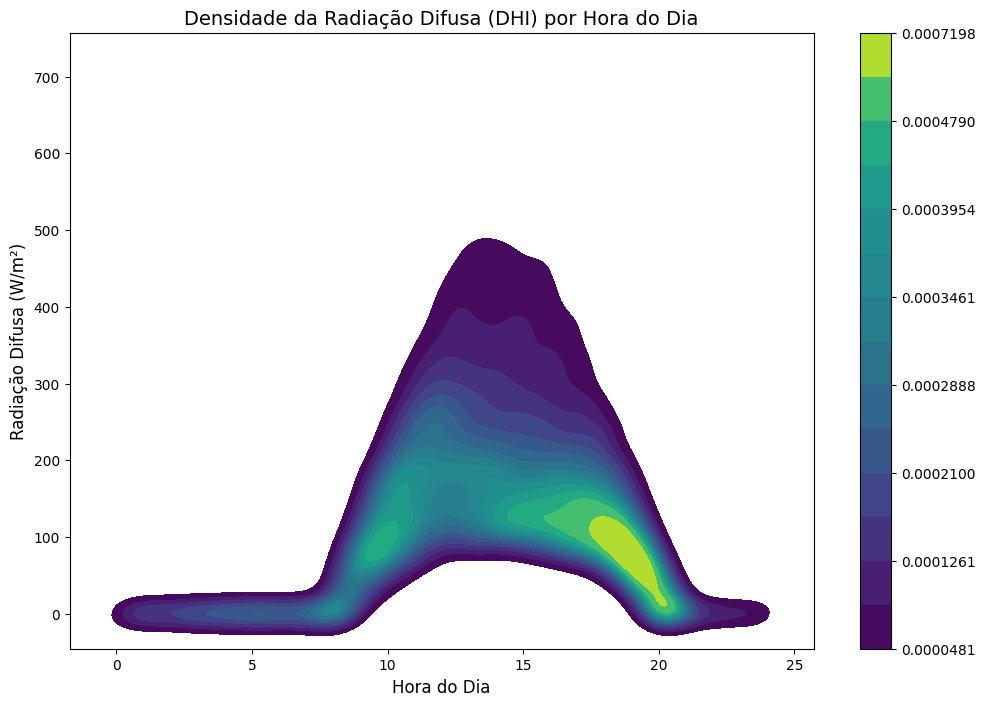

In [30]:
import seaborn as sns

# Extrair a hora do dia do índice datetime
df_corrigido['Hora'] = df_corrigido.index.hour + df_corrigido.index.minute/60

# Criar figura
plt.figure(figsize=(12, 8))

# Gráfico de densidade 2D
sns.kdeplot(
    data=df_corrigido.dropna(subset=['dif_avg_2']),
    x='Hora',
    y='dif_avg_2',
    cmap='viridis',
    fill=True,
    thresh=0.05,
    levels=15,
    cbar=True
)

# Configurações do gráfico
plt.title('Densidade da Radiação Difusa (DHI) por Hora do Dia', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Radiação Difusa (W/m²)', fontsize=12)
plt.colorbar(label='Densidade de Probabilidade')

# Linhas de referência
plt.axhline(y=1000, color='r', linestyle='--', alpha=0.5, label='Limite físico (1000 W/m²)')
plt.axvline(x=12, color='k', linestyle='--', alpha=0.5, label='Meio-dia solar')

# Ajustar eixos
plt.xlim(4, 20)  # Considerando apenas horas com sol
plt.ylim(0, min(1200, df_corrigido['dif_avg_2'].max()*1.1))

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

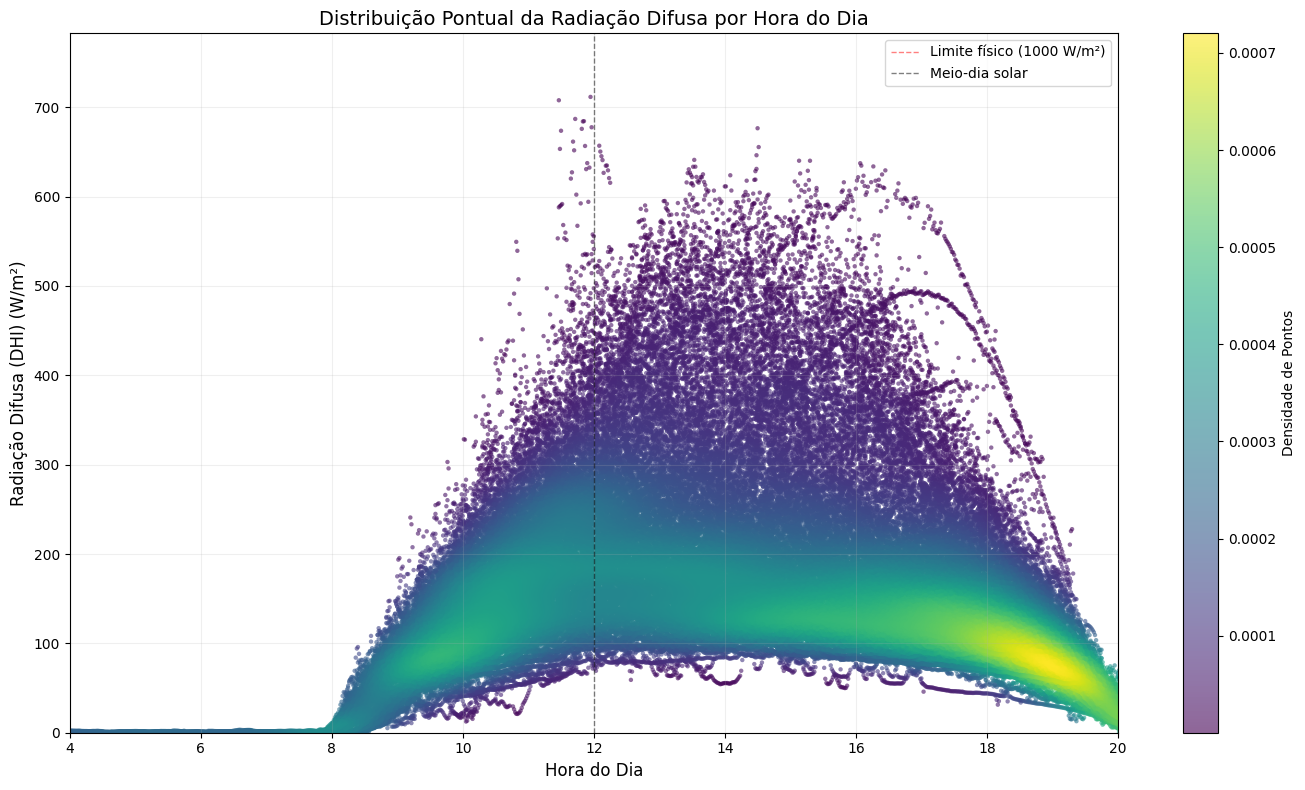

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Preparar os dados
hours = df_corrigido.index.hour + df_corrigido.index.minute/60
dhi_values = df_corrigido['dif_avg_2'].values
valid_mask = ~np.isnan(dhi_values)

# Calcular a densidade dos pontos
xy = np.vstack([hours[valid_mask], dhi_values[valid_mask]])
z = gaussian_kde(xy)(xy)

# Criar o gráfico
plt.figure(figsize=(14, 8))

# Plotar cada ponto com cor baseada na densidade
sc = plt.scatter(
    hours[valid_mask],
    dhi_values[valid_mask],
    c=z,
    cmap='viridis',
    alpha=0.6,
    s=10,
    edgecolors='none'
)

# Configurações do gráfico
plt.title('Distribuição Pontual da Radiação Difusa por Hora do Dia', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Radiação Difusa (DHI) (W/m²)', fontsize=12)
cbar = plt.colorbar(sc)
cbar.set_label('Densidade de Pontos')

# Linhas de referência
plt.axhline(y=1000, color='r', linestyle='--', alpha=0.5, linewidth=1, label='Limite físico (1000 W/m²)')
plt.axvline(x=12, color='k', linestyle='--', alpha=0.5, linewidth=1, label='Meio-dia solar')

# Ajustar eixos
plt.xlim(4, 20)
plt.ylim(0, min(1200, np.nanmax(dhi_values)*1.1))

plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

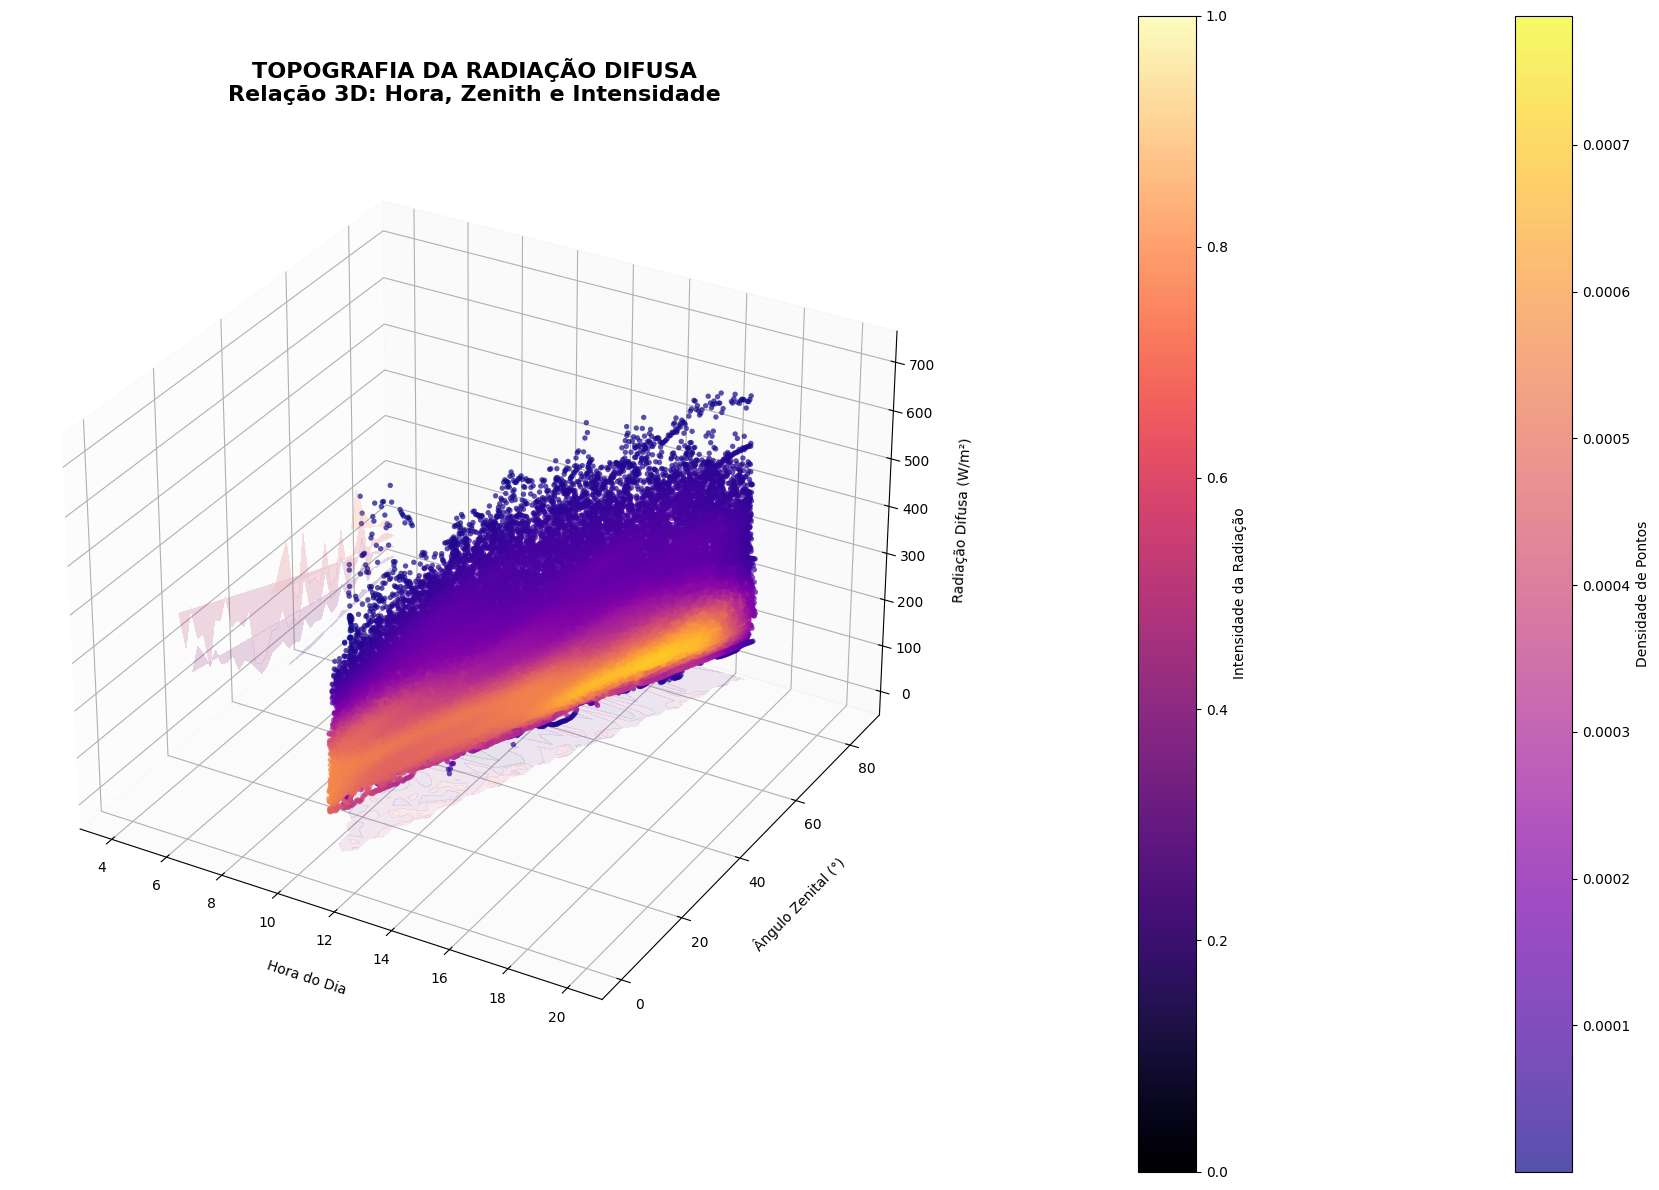

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.stats import gaussian_kde
from matplotlib.colors import LightSource

# Preparação dos dados
hours = df_corrigido.index.hour + df_corrigido.index.minute/60
dhi = df_corrigido['dif_avg_2'].values
zenith = df_corrigido['zenith'].values
valid = ~np.isnan(dhi) & (zenith < 85)

# Cálculo de densidade 2D para cores
xy = np.vstack([hours[valid], dhi[valid]])
density = gaussian_kde(xy)(xy)

# Configuração da figura 3D
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D avançado com cores baseadas em densidade
sc = ax.scatter(
    hours[valid],
    zenith[valid],
    dhi[valid],
    c=density,
    cmap='plasma',
    s=15,
    alpha=0.7,
    edgecolor='none',
    depthshade=True
)

# Criando uma superfície de referência
x_grid = np.linspace(4, 20, 50)
y_grid = np.linspace(0, 85, 50)
x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

# Interpolação para criar a superfície
from scipy.interpolate import griddata
z_grid = griddata(
    (hours[valid], zenith[valid]),
    dhi[valid],
    (x_mesh, y_mesh),
    method='linear'
)

# Aplicando efeito de iluminação na superfície
ls = LightSource(azdeg=315, altdeg=45)
rgb = ls.shade(z_grid, cmap=cm.magma, vert_exag=0.1, blend_mode='soft')

surf = ax.plot_surface(
    x_mesh, y_mesh, z_grid,
    facecolors=rgb,
    alpha=0.4,
    antialiased=True,
    linewidth=0,
    shade=False
)

# Linhas de contorno nos planos
ax.contourf(x_mesh, y_mesh, z_grid, zdir='z', offset=0, cmap='magma', alpha=0.1)
ax.contourf(x_mesh, y_mesh, z_grid, zdir='x', offset=4, cmap='magma', alpha=0.1)

# Configurações estéticas
ax.view_init(elev=30, azim=-60)
ax.set_xlabel('\nHora do Dia', linespacing=3)
ax.set_ylabel('\nÂngulo Zenital (°)', linespacing=3)
ax.set_zlabel('\nRadiação Difusa (W/m²)', linespacing=3)
ax.set_title('TOPOGRAFIA DA RADIAÇÃO DIFUSA\nRelação 3D: Hora, Zenith e Intensidade',
             fontsize=16, pad=20, fontweight='bold')

# Configuração do plano de fundo
ax.xaxis.pane.set_alpha(0.2)
ax.yaxis.pane.set_alpha(0.2)
ax.zaxis.pane.set_alpha(0.2)
ax.grid(True, linestyle=':', alpha=0.5)

# Barras de cores
cbar1 = fig.colorbar(sc, ax=ax, pad=0.1, label='Densidade de Pontos')
cbar2 = fig.colorbar(plt.cm.ScalarMappable(cmap=cm.magma), ax=ax, pad=0.15, label='Intensidade da Radiação')

plt.tight_layout()
plt.show()

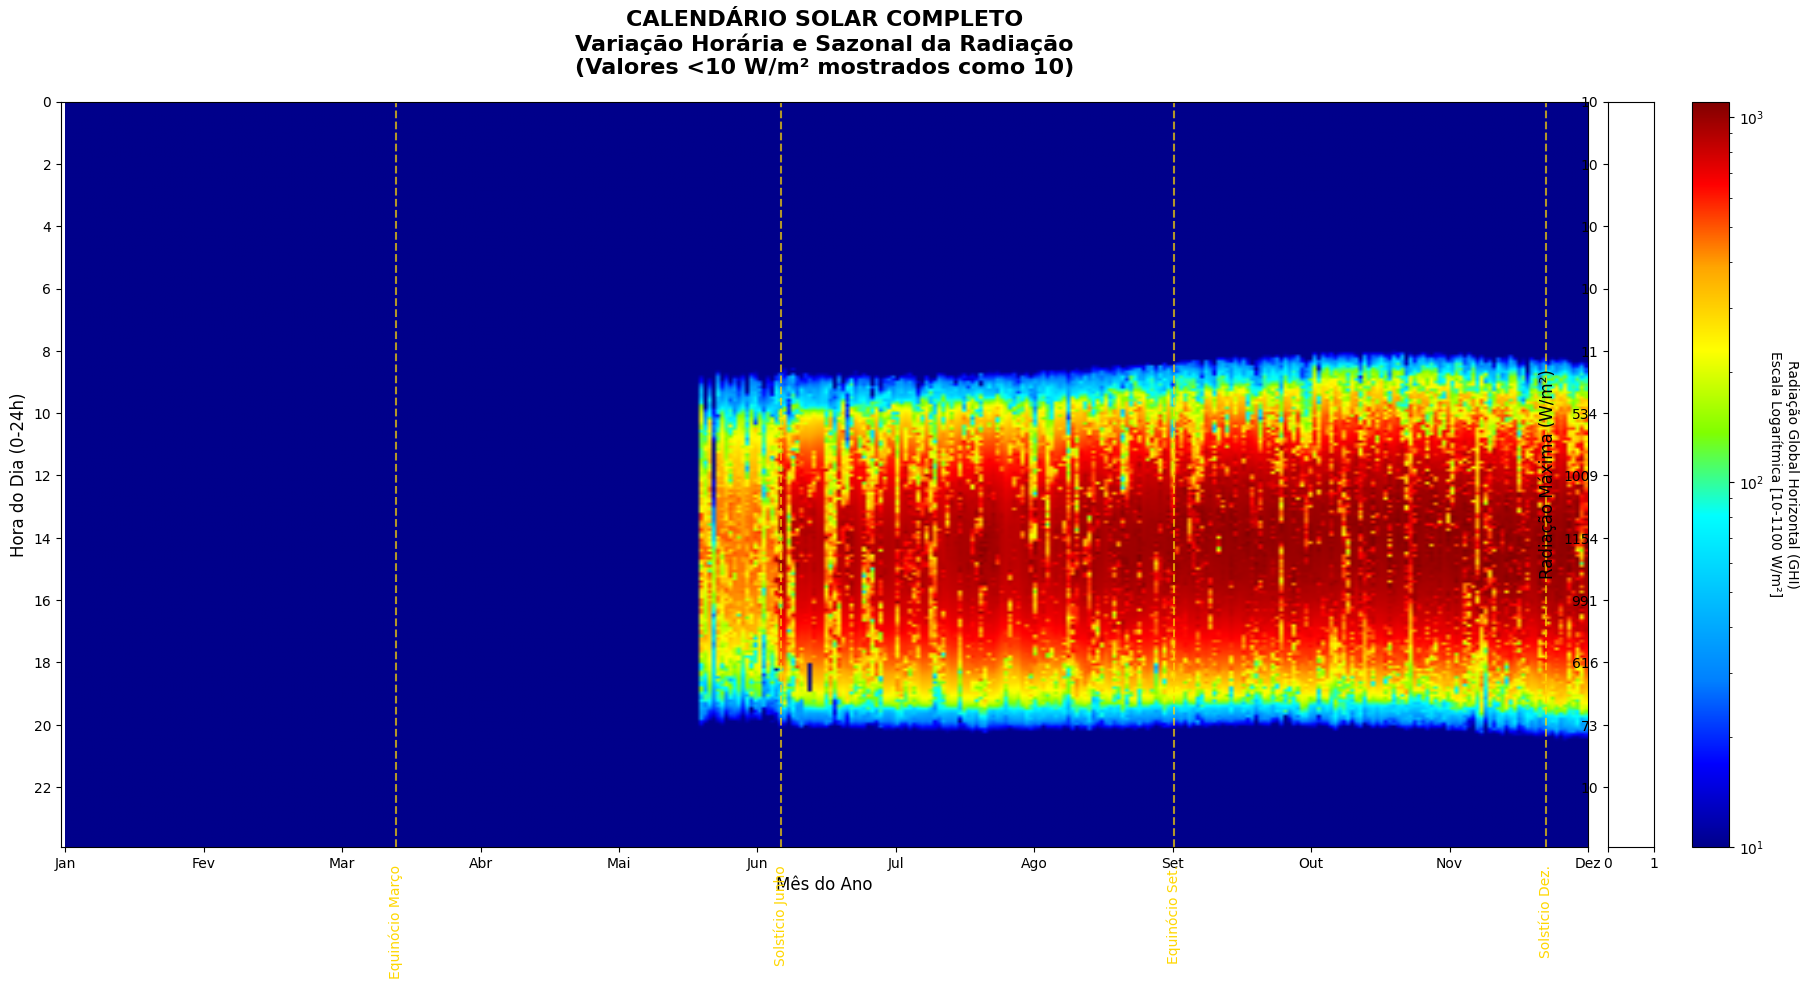

In [33]:
# Versão com valores zero substituídos por 10 W/m²

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Configuração dos dados
df_corrigido['Dia_Ano'] = df_corrigido.index.dayofyear
df_corrigido['Hora_Decimal'] = df_corrigido.index.hour + df_corrigido.index.minute/60

# Matriz completa de radiação
horas = np.linspace(0, 23.916, 288)  # 288 = 24h * 12 pontos/hora (5 min interval)
dias = np.arange(1, 366)
rad_matrix = np.full((len(horas), len(dias)), np.nan)

# Preenchimento otimizado da matriz
for i, dia in enumerate(dias):
    dia_data = df_corrigido[df_corrigido['Dia_Ano'] == dia]
    if not dia_data.empty:
        for j, hora in enumerate(horas):
            hora_mask = (abs(dia_data['Hora_Decimal'] - hora) < 0.042)  # ~2.5 min
            if hora_mask.any():
                rad_matrix[j, i] = dia_data.loc[hora_mask, 'glo_avg_2'].median()

# Substituir NaN por 10 (em vez de 0)
rad_matrix = np.nan_to_num(rad_matrix, nan=10)

# Configuração da figura
fig, ax = plt.subplots(figsize=(20, 10))

# Colormap aprimorado
colors = ["#00008B", "#0000FF", "#0080FF",
          "#00BFFF", "#00FFFF", "#80FF00", "#FFFF00",
          "#FFA500", "#FF0000", "#800000"]
cmap_custom = LinearSegmentedColormap.from_list("rad_cmap", colors, N=1024)

# Plot do heatmap com escala logarítmica
im = ax.imshow(rad_matrix,
               aspect='auto',
               cmap=cmap_custom,
               norm=LogNorm(vmin=10, vmax=1100),  # vmin=10 para incluir os "zeros"
               extent=[1, 365, 23.916, 0],
               interpolation='bilinear')

# Configurações dos eixos
ax.set_yticks(np.arange(0, 24, 2))
ax.set_ylabel('Hora do Dia (0-24h)', fontsize=12)
ax.set_ylim(23.916, 0)

# Eixo X com meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
ax.set_xticks(np.linspace(1, 365, 12))
ax.set_xticklabels(meses)
ax.set_xlabel('Mês do Ano', fontsize=12)

# Eixo secundário para radiação máxima (agora incluindo o 10)
def hora_to_rad(h):
    idx = np.abs(horas - h).argmin()
    return np.max(rad_matrix[idx, :])

divider = make_axes_locatable(ax)
ax_right = divider.append_axes("right", size="3%", pad=0.2)
ax_right.set_ylabel('Radiação Máxima (W/m²)', fontsize=12)
ax_right.set_yticks(np.arange(0, 24, 2))
ax_right.set_yticklabels([f"{hora_to_rad(h):.0f}" for h in np.arange(0, 24, 2)])
ax_right.set_ylim(23.916, 0)

# Linhas de contorno (ajustar níveis para começar em 10)
contour_levels = [10, 50, 100, 200, 400, 600, 800, 1000]
CS = ax.contour(rad_matrix, levels=contour_levels, colors='white', alpha=0.5)
ax.clabel(CS, inline=True, fontsize=8, fmt='%d W/m²')

# Barra de cores
cbar = fig.colorbar(im, ax=ax, pad=0.02)
cbar.set_label('Radiação Global Horizontal (GHI)\nEscala Logarítmica [10-1100 W/m²]',
               rotation=270, labelpad=25)

# Elementos adicionais
ax.set_title('CALENDÁRIO SOLAR COMPLETO\nVariação Horária e Sazonal da Radiação\n(Valores <10 W/m² mostrados como 10)',
             fontsize=16, pad=20, fontweight='bold')

# Eventos astronômicos
events = {
    'Equinócio Março': 80, 'Solstício Junho': 172,
    'Equinócio Set.': 266, 'Solstício Dez.': 355
}
for name, day in events.items():
    ax.axvline(x=day, color='gold', linestyle='--', alpha=0.7)
    ax.text(day, 24.5, name, rotation=90, ha='center', va='top',
            color='gold', fontsize=10)

plt.tight_layout()
plt.show()

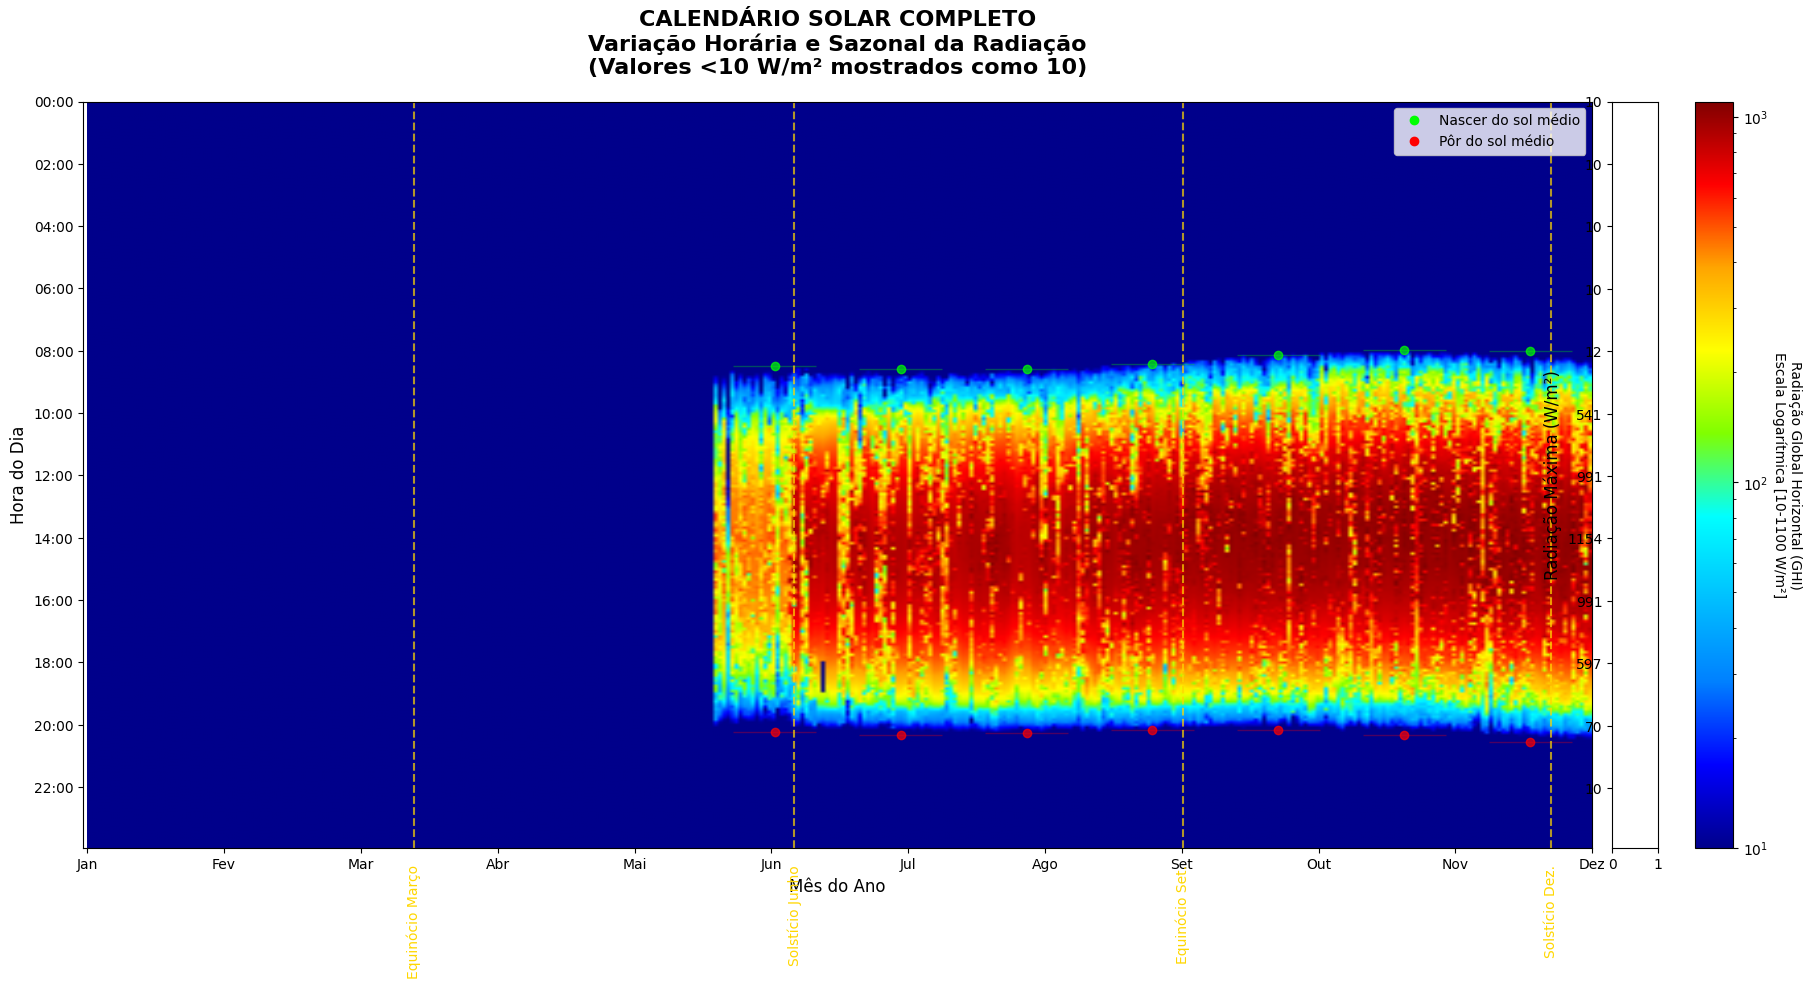

In [34]:
# Versão com marcadores horizontais mensais

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pvlib.solarposition import get_solarposition

# Configuração
latitude = -5.795
longitude = -35.209

# Calcular nascer/por do sol médio por mês
monthly_sun = {}
for month in range(1, 13):
    month_data = df_corrigido[df_corrigido.index.month == month]
    if not month_data.empty:
        elevations = get_solarposition(month_data.index, latitude, longitude)['elevation']
        sunrise = month_data[elevations > 0].index.min()
        sunset = month_data[elevations > 0].index.max()
        monthly_sun[month] = (
            sunrise.hour + sunrise.minute/60,
            sunset.hour + sunset.minute/60
        )

# Preparar matriz de radiação (mesmo código anterior)
df_corrigido['Dia_Ano'] = df_corrigido.index.dayofyear
df_corrigido['Hora_Decimal'] = df_corrigido.index.hour + df_corrigido.index.minute/60
horas = np.linspace(0, 23.958, 288)
dias = np.arange(1, 366)
rad_matrix = np.full((len(horas), len(dias)), np.nan)

for i, dia in enumerate(dias):
    dia_data = df_corrigido[df_corrigido['Dia_Ano'] == dia]
    if not dia_data.empty:
        for j, hora in enumerate(horas):
            hora_mask = (abs(dia_data['Hora_Decimal'] - hora) < 0.042)
            if hora_mask.any():
                rad_matrix[j, i] = dia_data.loc[hora_mask, 'glo_avg_2'].median()

rad_matrix = np.nan_to_num(rad_matrix, nan=10)

# Plot
fig, ax = plt.subplots(figsize=(20, 10))

# Heatmap (mesmo estilo anterior)
colors = ["#00008B", "#0000FF", "#0080FF", "#00BFFF", "#00FFFF",
          "#80FF00", "#FFFF00", "#FFA500", "#FF0000", "#800000"]
cmap = LinearSegmentedColormap.from_list("rad", colors, N=1024)
im = ax.imshow(rad_matrix, aspect='auto', cmap=cmap,
               norm=LogNorm(vmin=10, vmax=1100),
               extent=[1, 365, 23.958, 0], interpolation='bilinear')

# Adicionar marcadores horizontais mensais
month_positions = np.linspace(15, 350, 12)  # Posições médias dos meses
for month in range(1, 13):
    if month in monthly_sun:
        sunrise, sunset = monthly_sun[month]

        # Ajustar +3 horas (limitando para não ultrapassar 24h)
        sunrise_adj = min(sunrise + 3, 23.958)
        sunset_adj = min(sunset + 3, 23.958)

        pos = month_positions[month-1]

        # Marcador de nascer do sol ajustado
        ax.plot(pos, sunrise_adj, 'o', color='lime', markersize=6, alpha=0.7)

        # Marcador de pôr do sol ajustado
        ax.plot(pos, sunset_adj, 'o', color='red', markersize=6, alpha=0.7)

        # Linha horizontal conectando
        ax.hlines(y=[sunrise_adj, sunset_adj], xmin=pos-10, xmax=pos+10,
                 colors=['lime', 'red'], linestyles='-', alpha=0.3, linewidths=1)

# Configurações dos eixos
ax.set_yticks(np.arange(0, 24, 2))
ax.set_yticklabels([f"{h:02d}:00" for h in range(0, 24, 2)])
ax.set_ylabel('Hora do Dia', fontsize=12)
ax.set_ylim(23.958, 0)

# Eixo X com meses
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
ax.set_xticks(np.linspace(1, 365, 12))
ax.set_xticklabels(meses)
ax.set_xlabel('Mês do Ano', fontsize=12)

# Legenda
ax.plot([], [], 'o', color='lime', label='Nascer do sol médio')
ax.plot([], [], 'o', color='red', label='Pôr do sol médio')
ax.legend(loc='upper right')

# Eixo secundário para radiação máxima (agora incluindo o 10)
def hora_to_rad(h):
    idx = np.abs(horas - h).argmin()
    return np.max(rad_matrix[idx, :])

divider = make_axes_locatable(ax)
ax_right = divider.append_axes("right", size="3%", pad=0.2)
ax_right.set_ylabel('Radiação Máxima (W/m²)', fontsize=12)
ax_right.set_yticks(np.arange(0, 24, 2))
ax_right.set_yticklabels([f"{hora_to_rad(h):.0f}" for h in np.arange(0, 24, 2)])
ax_right.set_ylim(23.916, 0)

# Linhas de contorno (ajustar níveis para começar em 10)
contour_levels = [10, 50, 100, 200, 400, 600, 800, 1000]
CS = ax.contour(rad_matrix, levels=contour_levels, colors='white', alpha=0.5)
ax.clabel(CS, inline=True, fontsize=8, fmt='%d W/m²')

# Barra de cores
cbar = fig.colorbar(im, ax=ax, pad=0.02)
cbar.set_label('Radiação Global Horizontal (GHI)\nEscala Logarítmica [10-1100 W/m²]',
               rotation=270, labelpad=25)

# Elementos adicionais
ax.set_title('CALENDÁRIO SOLAR COMPLETO\nVariação Horária e Sazonal da Radiação\n(Valores <10 W/m² mostrados como 10)',
             fontsize=16, pad=20, fontweight='bold')

# Eventos astronômicos
events = {
    'Equinócio Março': 80, 'Solstício Junho': 172,
    'Equinócio Set.': 266, 'Solstício Dez.': 355
}
for name, day in events.items():
    ax.axvline(x=day, color='gold', linestyle='--', alpha=0.7)
    ax.text(day, 24.5, name, rotation=90, ha='center', va='top',
            color='gold', fontsize=10)

plt.tight_layout()
plt.show()

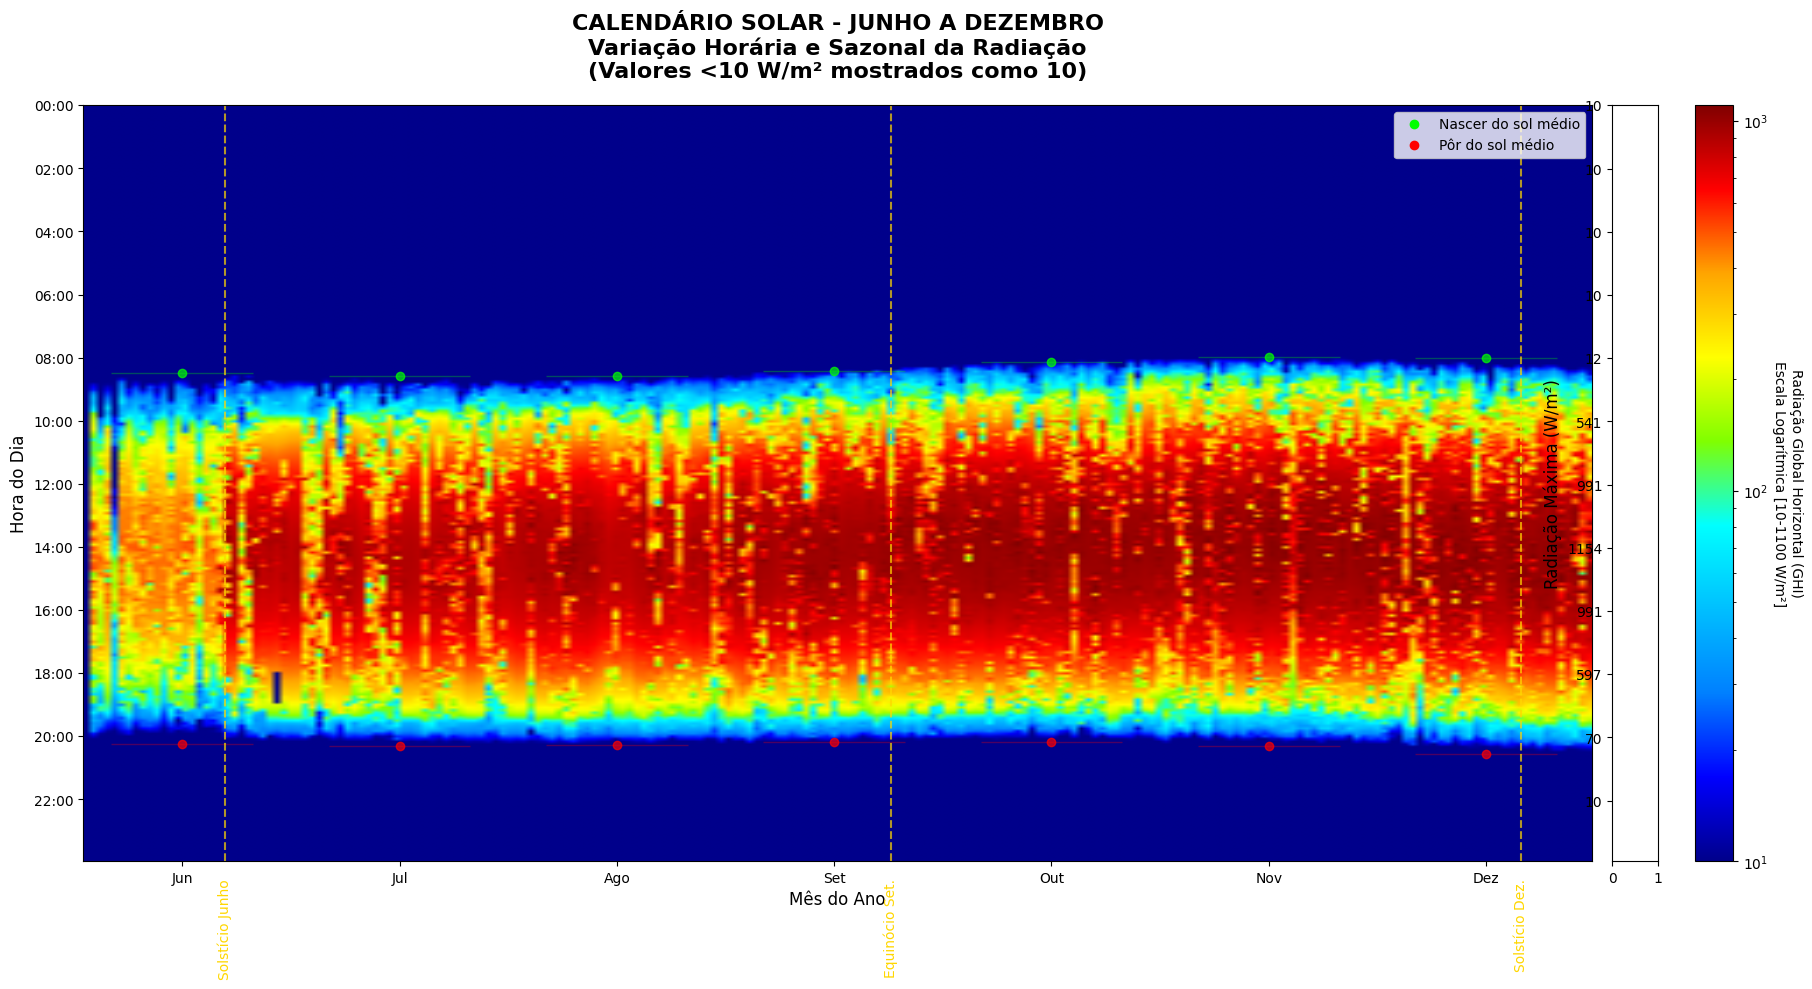

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pvlib.solarposition import get_solarposition

# Coordenadas da estação
latitude = -5.795
longitude = -35.209

# Calcular nascer/pôr do sol médio por mês
monthly_sun = {}
for month in range(1, 13):
    month_data = df_corrigido[df_corrigido.index.month == month]
    if not month_data.empty:
        elevations = get_solarposition(month_data.index, latitude, longitude)['elevation']
        sunrise = month_data[elevations > 0].index.min()
        sunset = month_data[elevations > 0].index.max()
        monthly_sun[month] = (
            sunrise.hour + sunrise.minute / 60,
            sunset.hour + sunset.minute / 60
        )

# Preparar matriz de radiação
df_corrigido['Dia_Ano'] = df_corrigido.index.dayofyear
df_corrigido['Hora_Decimal'] = df_corrigido.index.hour + df_corrigido.index.minute / 60
horas = np.linspace(0, 23.958, 288)
dias = np.arange(152, 366)  # Apenas de junho até dezembro
rad_matrix = np.full((len(horas), len(dias)), np.nan)

for i, dia in enumerate(dias):
    dia_data = df_corrigido[df_corrigido['Dia_Ano'] == dia]
    if not dia_data.empty:
        for j, hora in enumerate(horas):
            hora_mask = (abs(dia_data['Hora_Decimal'] - hora) < 0.042)
            if hora_mask.any():
                rad_matrix[j, i] = dia_data.loc[hora_mask, 'glo_avg_2'].median()

rad_matrix = np.nan_to_num(rad_matrix, nan=10)

# Plot
fig, ax = plt.subplots(figsize=(20, 10))

# Heatmap
colors = ["#00008B", "#0000FF", "#0080FF", "#00BFFF", "#00FFFF",
          "#80FF00", "#FFFF00", "#FFA500", "#FF0000", "#800000"]
cmap = LinearSegmentedColormap.from_list("rad", colors, N=1024)
im = ax.imshow(rad_matrix, aspect='auto', cmap=cmap,
               norm=LogNorm(vmin=10, vmax=1100),
               extent=[152, 365, 23.958, 0], interpolation='bilinear')

# Marcadores horizontais mensais (junho a dezembro)
month_positions = np.linspace(166, 350, 7)  # Posição média dos meses de junho a dezembro
meses = ['Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

for i, month in enumerate(range(6, 13)):  # Junho (6) a Dezembro (12)
    if month in monthly_sun:
        sunrise, sunset = monthly_sun[month]
        sunrise_adj = min(sunrise + 3, 23.958)
        sunset_adj = min(sunset + 3, 23.958)
        pos = month_positions[i]
        ax.plot(pos, sunrise_adj, 'o', color='lime', markersize=6, alpha=0.7)
        ax.plot(pos, sunset_adj, 'o', color='red', markersize=6, alpha=0.7)
        ax.hlines(y=[sunrise_adj, sunset_adj], xmin=pos - 10, xmax=pos + 10,
                  colors=['lime', 'red'], linestyles='-', alpha=0.3, linewidths=1)

# Eixo Y
ax.set_yticks(np.arange(0, 24, 2))
ax.set_yticklabels([f"{h:02d}:00" for h in range(0, 24, 2)])
ax.set_ylabel('Hora do Dia', fontsize=12)
ax.set_ylim(23.958, 0)

# Eixo X
ax.set_xticks(month_positions)
ax.set_xticklabels(meses)
ax.set_xlabel('Mês do Ano', fontsize=12)

# Legenda dos pontos
ax.plot([], [], 'o', color='lime', label='Nascer do sol médio')
ax.plot([], [], 'o', color='red', label='Pôr do sol médio')
ax.legend(loc='upper right')

# Eixo secundário com radiação máxima
def hora_to_rad(h):
    idx = np.abs(horas - h).argmin()
    return np.max(rad_matrix[idx, :])

divider = make_axes_locatable(ax)
ax_right = divider.append_axes("right", size="3%", pad=0.2)
ax_right.set_ylabel('Radiação Máxima (W/m²)', fontsize=12)
ax_right.set_yticks(np.arange(0, 24, 2))
ax_right.set_yticklabels([f"{hora_to_rad(h):.0f}" for h in np.arange(0, 24, 2)])
ax_right.set_ylim(23.916, 0)



# Barra de cores
cbar = fig.colorbar(im, ax=ax, pad=0.02)
cbar.set_label('Radiação Global Horizontal (GHI)\nEscala Logarítmica [10-1100 W/m²]',
               rotation=270, labelpad=25)

# Título
ax.set_title('CALENDÁRIO SOLAR - JUNHO A DEZEMBRO\nVariação Horária e Sazonal da Radiação\n(Valores <10 W/m² mostrados como 10)',
             fontsize=16, pad=20, fontweight='bold')

# Eventos astronômicos (a partir de junho)
events = {
    'Solstício Junho': 172,
    'Equinócio Set.': 266,
    'Solstício Dez.': 355
}
for name, day in events.items():
    ax.axvline(x=day, color='gold', linestyle='--', alpha=0.7)
    ax.text(day, 24.5, name, rotation=90, ha='center', va='top',
            color='gold', fontsize=10)

plt.tight_layout()
plt.show()
